In [1]:
!pwd
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
sys.path.insert(1,'/Users/kate/Tools/')
#from catalog_tools import crossmatch


try:
    from grizli import utils
    utils.set_warnings()
    read_catalog = utils.read_catalog
    print('using grizli')
except:
    from astropy.table import Table
    read_catalog = Table.read
    print('using astropy')

import eazy
print(eazy.__version__)

import os

using grizli
0.5.2.dev53


In [2]:
sys.path
eazy.__file__

'/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/__init__.py'

In [3]:
#root = 'path_to_files/c2020'
root = '/Users/clausen/Documents/jupyter/research/Cosmos2021/c2020'

## set up eazy parameters

In [4]:
!pwd


params = {}
params['CATALOG_FILE'] = 'COSMOS2020_FARMER_R1_v2.0.reform.fits' # this is the reformed photometry for eazy 

params['MAIN_OUTPUT_FILE'] = 'x.{0}.eazypy'.format(root)

params['Z_MAX'] = 12
params['Z_STEP'] = 0.005

params['PRIOR_ABZP'] = 23.9
params['PRIOR_FILTER'] = 259

params['MW_EBV'] = 0.017
params['CAT_HAS_EXTCORR'] = False

params['TEMPLATES_FILE'] = 'templates/xspline_templates/corr_sfhz_13.param'

params['MAIN_OUTPUT_FILE'] = 'Farmerv2.0.10.eazypy'

#params['IGM_SCALE_TAU'] = 0.5

params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'
params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'
params['TEMP_ERR_A2'] = 1.
params['SYS_ERR'] = 0.02

params['FILTERS_RES'] = 'FILTER.RES1.latest'

# params['TEMP_ERR_FILE'] = 'templates/flat_tef.txt'
# params['TEMP_ERR_A2'] = 1.
# params['SYS_ERR'] = 0.0

zpfile = None
zpfile = 'zphot.zeropoint.corr'
if not os.path.exists(zpfile):
    zpfile = None
    
print('zpfile: ', zpfile)

load_products = False
translate_file = 'cosmos2020_farmer.translate'
#translate_file = 'cosmos2020_farmer_new.translate'
#translate_file = 'farmer_v051120.full.zphot.translate'
#translate_file = 'test.zphot.translate'
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=zpfile, 
                          params=params, load_prior=True, load_products=load_products)

/Users/clausen/Documents/jupyter/research
zpfile:  zphot.zeropoint.corr
Read default param file: /opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: COSMOS2020_FARMER_R1_v2.0.reform.fits
   >>> NOBJ = 964506
CFHT_ustar_FLUX CFHT_ustar_FLUXERR (408): CFHT-megaprime-u9301-Betoule2013
CFHT_u_FLUX CFHT_u_FLUXERR (409): CFHT-megaprime-u9302-atmos+inst
HSC_g_FLUX HSC_g_FLUXERR (314): g_HSC.txt
HSC_r_FLUX HSC_r_FLUXERR (315): r_HSC.txt
HSC_i_FLUX HSC_i_FLUXERR (316): i_HSC.txt
HSC_z_FLUX HSC_z_FLUXERR (317): z_HSC.txt
HSC_y_FLUX HSC_y_FLUXERR (318): y_HSC.txt
UVISTA_Ks_FLUX UVISTA_Ks_FLUXERR (259): VISTA/Ks_system+atmos.dat
UVISTA_Y_FLUX UVISTA_Y_FLUXERR (256): VISTA/Y_system+atmos.dat
UVISTA_H_FLUX UVISTA_H_FLUXERR (258): VISTA/H_system+atmos.dat
UVISTA_J_FLUX UVISTA_J_FLUXERR (257): VISTA/J_system+atmos.dat
IRAC_CH1_FLUX IRAC_CH1_FLUXERR ( 18): IRAC/irac_tr1_2004-08-09.dat
IRAC_CH2_FLUX IRAC_CH2_FLUXERR ( 19): IRAC/irac_tr2_2004-08-09.dat

100%|███████████████████████████████████████████| 13/13 [00:41<00:00,  3.15s/it]


Template   0: corr_sfhz_13_bin0_av0.01.fits (NZ=14).
Template   1: corr_sfhz_13_bin0_av0.25.fits (NZ=14).
Template   2: corr_sfhz_13_bin0_av0.50.fits (NZ=14).
Template   3: corr_sfhz_13_bin0_av1.00.fits (NZ=14).
Template   4: corr_sfhz_13_bin1_av0.01.fits (NZ=14).
Template   5: corr_sfhz_13_bin1_av0.25.fits (NZ=14).
Template   6: corr_sfhz_13_bin1_av0.50.fits (NZ=14).
Template   7: corr_sfhz_13_bin1_av1.00.fits (NZ=14).
Template   8: corr_sfhz_13_bin2_av0.01.fits (NZ=14).
Template   9: corr_sfhz_13_bin2_av0.50.fits (NZ=14).
Template  10: corr_sfhz_13_bin2_av1.00.fits (NZ=14).
Template  11: corr_sfhz_13_bin3_av0.01.fits (NZ=14).
Template  12: corr_sfhz_13_bin3_av0.50.fits (NZ=14).
Process templates: 41.934 s


511it [05:36,  1.52it/s]


In [5]:
if 'ID' in self.cat.colnames:
    self.cat.rename_column('ID','id')

## Apply spatial offsets

In [6]:
# Apply spatial offsets
#root_offsets = 'path_to_file/Cosmos2021'
root_offsets = '/Users/clausen/Documents/jupyter/research/Cosmos2021/'
import glob, os

xycols=('ALPHA_J2000','DELTA_J2000')
xycols = ('ra', 'dec')

if 'C2020/classic_v1.5' in root_offsets:
    files = glob.glob('aperNovErr.*eazypy*_00[123].npy')    
elif 'farmer_v051120' in root_offsets:
    files = glob.glob('farmerNovErr.*eazypy*FLUX_00[123].npy')
elif 'Cosmos2021' in root_offsets:
    files = glob.glob(root_offsets+'iK.Farmerv2.0.eazypy_*_FLUX.npy')
    print('spatial offsets applied')
    
files.sort()

for file in files:
    
    filename = os.path.basename(file)
    band = '_'.join(filename.split('_')[1:-1])+'_FLUX'
    if band not in self.flux_columns:
        print('not found')
        continue

    _x, ret = np.load(file, allow_pickle=True)
    i, col_i, f_name, msum, min_sn = _x
    if col_i not in self.flux_columns:
        print('Skip ', file)
        continue

    ifilt = self.flux_columns.index(col_i)
    print(file, ifilt, col_i, msum)
    self.apply_spatial_offset(ifilt, ret, xycols=xycols)
    print('spatial offsets applied')

#del(self.spatial_offset)
#self.spatial_offset = None

spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_u_FLUX.npy 1 CFHT_u_FLUX 133275
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_CFHT_ustar_FLUX.npy 0 CFHT_ustar_FLUX 143610
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_g_FLUX.npy 2 HSC_g_FLUX 163074
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_i_FLUX.npy 4 HSC_i_FLUX 170266
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_r_FLUX.npy 3 HSC_r_FLUX 167709
Set sys_err = 0.02 (positive=True)
spatial offsets applied
/Users/clausen/Documents/jupyter/research/Cosmos2021/iK.Farmerv2.0.eazypy_HSC_y_FLUX.npy 6 HSC_y_FLUX 168798
Set sys_err = 0

## Read in zphot and official catalog 

In [7]:
# do star selection here but just best fit templates, not on morphologies 

zoutf = read_catalog('c2020.zout.fits')
officialf = read_catalog('COSMOS2020_FARMER_R1_v2.0.fits')

cat = zoutf
official = officialf

## suggested star galaxy separation - write your own if you prefer! 

stars:  26854 964506
--


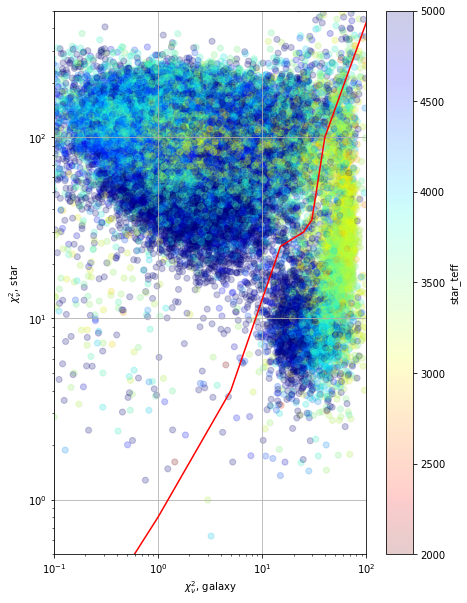

In [8]:
# save output 
# Chi-squared from stellar and galaxy template fits
# nnu = official['nusefilt'][has_hst]-1
# xnu = official['nusefilt']-1

galaxy_chinu = official['ez_z_phot_chi2'] / (official['ez_nusefilt'] - 1)
stellar_chinu = official['ez_star_min_chi2'] / (official['ez_nusefilt'] - 1)


# orig
keep = (official['HSC_i_MAG'] < 22) & (galaxy_chinu < 25) #& (zout['z_spec'] > 0)
# update
keep = (official['HSC_i_MAG'] < 23) & (galaxy_chinu < 100) #& (official['z_spec'] > 0)
ss = official['ez_z_phot']>4.
plt.figure(figsize=(7,10))
plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
           color='0.8', alpha=0.1)

#sc = plt.scatter(galaxy_chinu[fsel], stellar_chinu[fsel], 
#            c=official['star_teff'][fsel], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#sel = official['lp_type']==1
sc = plt.scatter(galaxy_chinu[keep], stellar_chinu[keep], 
            c=official['ez_star_teff'][keep], vmin=2000, vmax=5000, alpha=0.2, cmap='jet_r')

#sc = plt.scatter(galaxy_chinu[~keep], stellar_chinu[~keep], 
            #alpha=0.01, c='blue',s=5)
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.5,50)

plt.ylabel(r'$\chi^2_\nu$, star')


xsep = [0.001, 0.1, 1,      5,   15, 25, 30, 40, 2000*10]
ysep = [0.001, 0.1, 1*0.8, 5*0.8, 25, 30, 35, 100, 200000*10]

yline = np.interp(galaxy_chinu, xsep, ysep)
IS_STAR = (galaxy_chinu > 0) & (stellar_chinu < yline) & (official['HSC_i_MAG'] < 25) & (official['ez_z_phot'] > 0) #(probs a star)
IS_STAR |= (stellar_chinu < 8) & (official['ez_z_phot'] <= 0) #if eazy didnt fit but has good star chi, its a star (probs) 

IS_STAR |= (galaxy_chinu > 0) & (stellar_chinu*2 < yline) & (official['HSC_i_MAG'] > 25) & (official['ez_star_teff'] < 4000)
# clump of z~6 galaxies probs t dwarfs 
#IS_STAR &= official['star_teff'] < 6000
# ?????? 

dy_star = (stellar_chinu/yline)
delta_chi_star = (stellar_chinu - galaxy_chinu)*(official['ez_nusefilt'] - 1)

cb = plt.colorbar(sc)
cb.set_label('star_teff')


plt.loglog()
plt.xlim(0.1, 100)
plt.ylim(0.5,500)
    #ax.plot(ax.get_xlim(), ax.get_xlim(), color='r')
plt.xlabel(r'$\chi^2_\nu$, galaxy')
plt.grid()
plt.plot(xsep, ysep, color='r')
    
# cb = plt.colorbar(sc, shrink=0.5)
# cb.set_label(f'FLUX_RADIUS, {filt} 50mas pix')
# plt.grid()

#fig.tight_layout(pad=0.5)

#is_star = (official['z_phot_chi2'] > official['star_min_chi2']) & (np.log10(official['star_teff']) < 3.62)
print('stars: ', IS_STAR.sum(), len(IS_STAR))

# add flags for minimum filter requirements:
# all HSC, UVISTA AND IRAC FILTERS REQUIRED AT A MINIMUM


# make not star flag 

print(sum(IS_STAR>0.))

official['STAR_FLAG'] = IS_STAR

## make a sample and plot it's seds and uvj diagram 

In [9]:
def sep_line(vj):
    if vj<0.75:
        uv = 1.3
    if vj>0.75:
        uv = 0.8*(vj)+0.7
    if vj>1.5:
        uv = 0.
    return uv

def uvj(cat,save=False):

    labels = { 'z' :r'$z_{phot}$', 
         'mass' : r'Stellar mass [$M_{\odot}$]',
         'ssfr': r'sSFR [$yr^{-1}$] (past 100Myr)',
          'sfr': r'SFR [$M_{\odot}yr^{-1}$]',
         'fsize': 20}


    plt.figure(figsize=(7,6))
    sc = plt.scatter(cat['vj'],cat['uv'],\
                    c=cat['ssfr'],cmap='RdYlBu',\
                s=5, alpha=0.9)
    cb = plt.colorbar(sc)
    cb.set_label(labels['ssfr'])

    plt.xlabel('V-J',fontsize=labels['fsize'])
    plt.ylabel('U-V',fontsize=labels['fsize'])

    plt.grid(alpha=0.7)

    plt.xlim(-0.5,3)
    plt.ylim(-0.5,3)

    vj = np.arange(-1,1.6,0.1)
    uv = [sep_line(v) for v in vj]
    plt.vlines(x=1.5, ymin=1.9,ymax = 3,color='black')

    plt.plot(vj,uv,c='black')
    
    if save:
        plt.savefig('uvj-test.pdf')


In [10]:
cat = official


cat['uv'] = -2.5*np.log10(cat['ez_restU']/cat['ez_restV'])
cat['vj'] = -2.5*np.log10(cat['ez_restV']/cat['ez_restJ'])
cat['uv_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restU_err']/cat['ez_restU'])**2.+(cat['ez_restV_err']/cat['ez_restV'])**2.)
cat['vj_err'] = 2.5*np.log(10.)*np.sqrt((cat['ez_restV_err']/cat['ez_restV'])**2.+(cat['ez_restJ_err']/cat['ez_restJ'])**2.)

cat['ssfr'] = cat['ez_sfr']-(cat['ez_mass'])

def sel_uvj(g):
    "returns True for things which are uvj selected"
    sel = ((g['uv'])>(0.8*(g['vj']))+0.7) & ((g['uv'])>1.3) & ((g['vj'])<1.5)
    #sel = np.where(np.isnan(g['uv']), sel, np.nan)
    return sel


In [11]:
# select 3<z<6 massive in c2020 and compare to zfourge: 
# FARMER


mcut = 11.5
zlo = 0.5
zhi = 1.

fsel = (cat['ez_z_phot']>zlo) \
        & (cat['ez_z_phot']<zhi)  \
    & (cat['STAR_FLAG']==0) & \
    (cat['FLAG_COMBINED']==0) \
    & (cat['ez_mass']>mcut) & \
    (cat['UVISTA_Ks_MAG']<25.) \
    & ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & (cat['ez_mass']<12)



qsel = fsel&sel_uvj(cat)


print(f'{zlo}<z<{zhi} log(m*)>{mcut} sources in farmer:', np.sum(fsel))
print('And', np.sum(qsel), 'are in the UVJ quiescent region')

0.5<z<1.0 log(m*)>11.5 sources in farmer: 94
And 45 are in the UVJ quiescent region


In [12]:
self.fit_catalog(idx=qsel)

 32%|█████████████                            | 163/511 [00:04<00:04, 86.67it/s]


 NNLS quitting on iteration count.


100%|████████████████████████████████████████| 511/511 [00:05<00:00, 100.02it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=48)
Fit 22.8 s (n_proc=4, NOBJ=48)


/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/103633668.py:20: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  s = f'ID = {ii}'
/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/eazy/photoz.py:2730: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


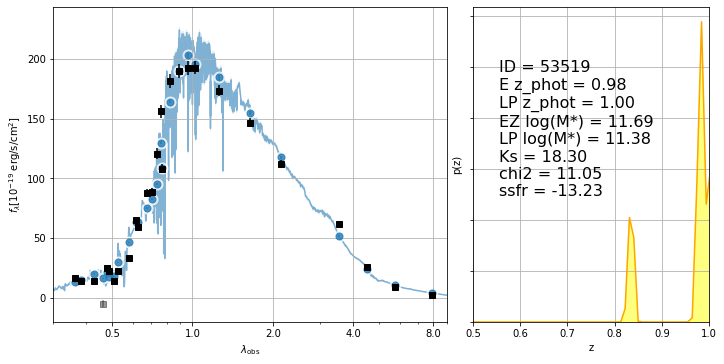

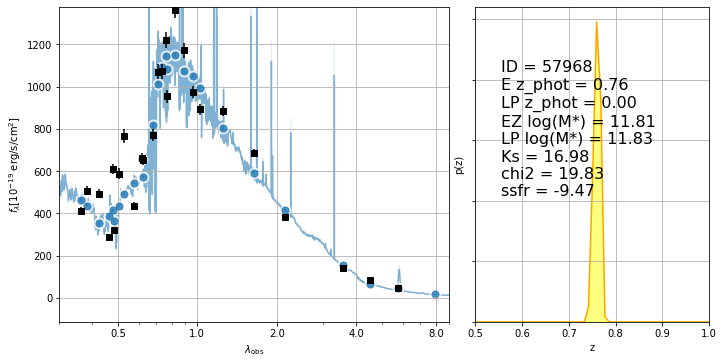

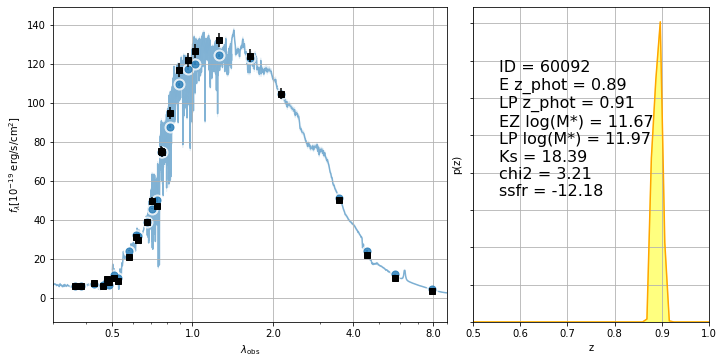

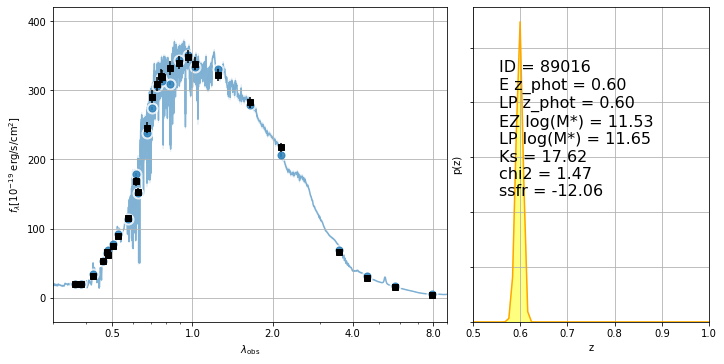

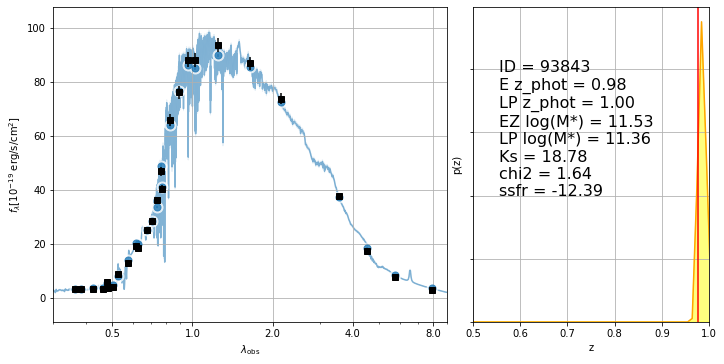

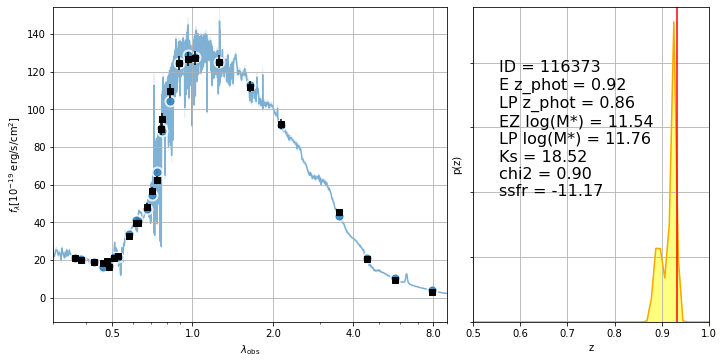

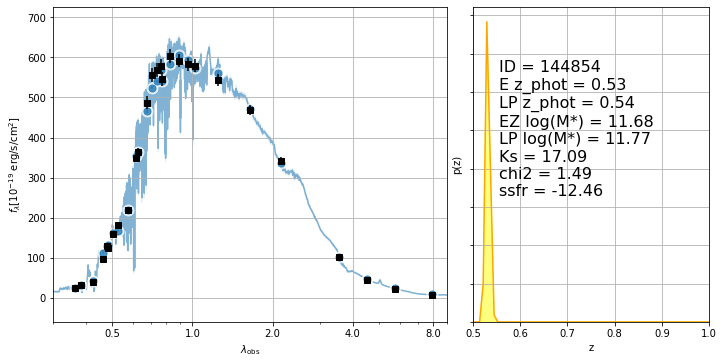

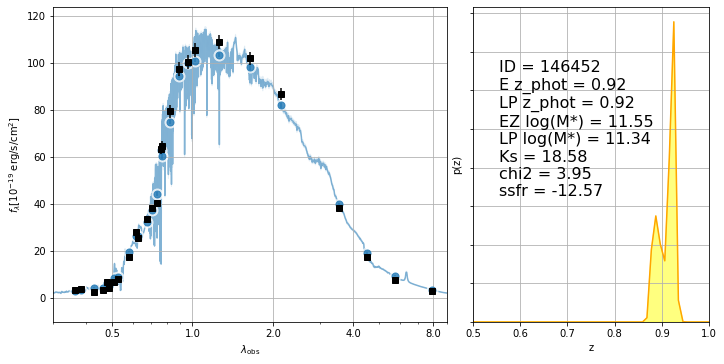

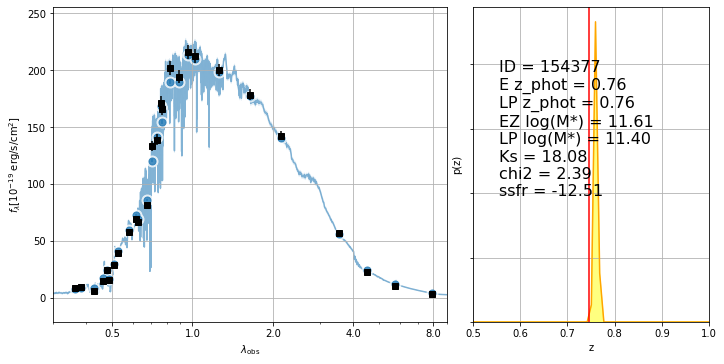

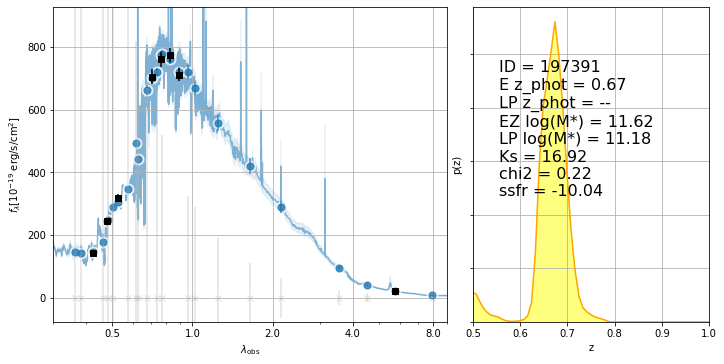

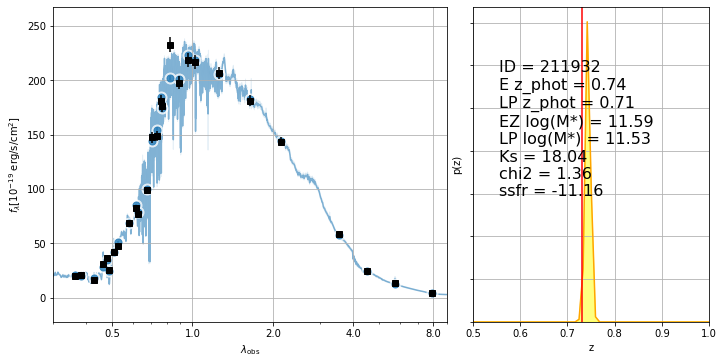

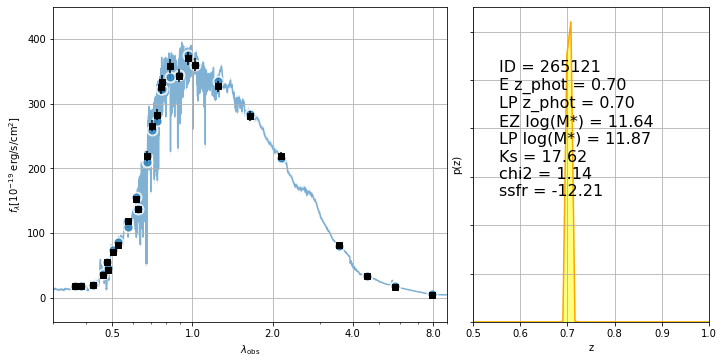

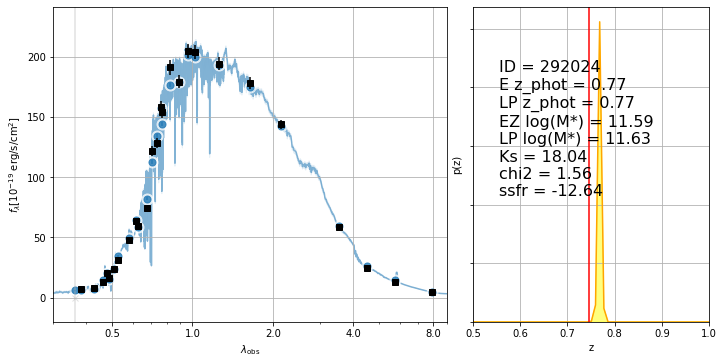

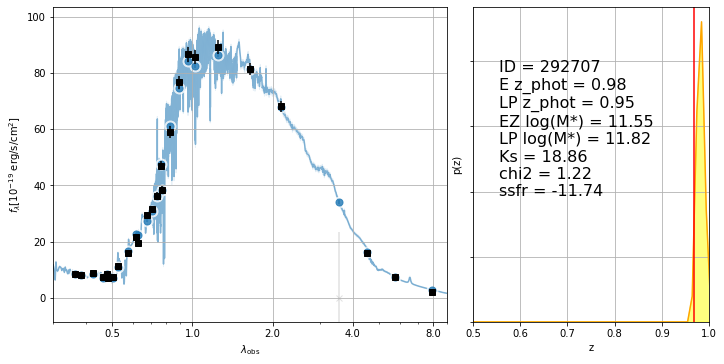

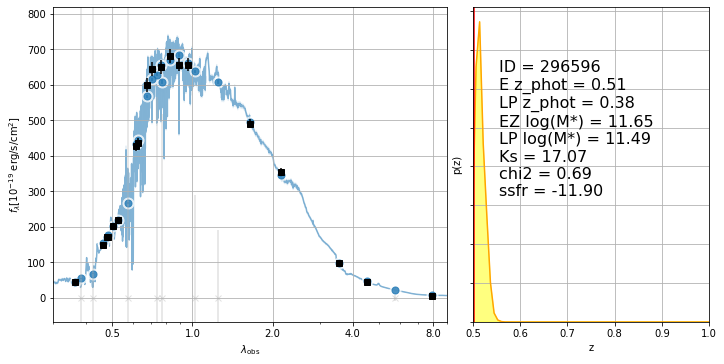

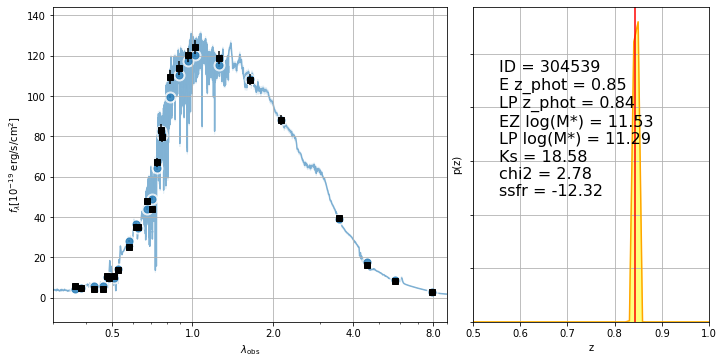

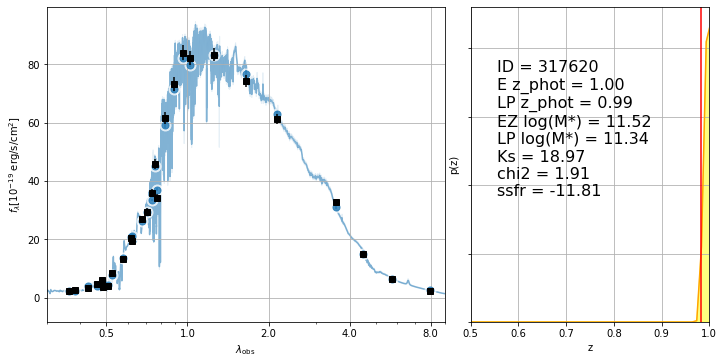

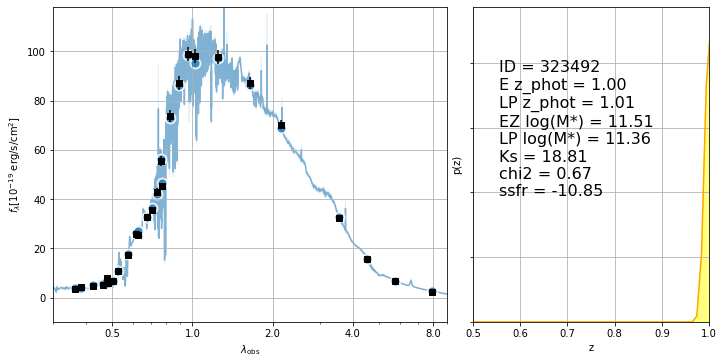

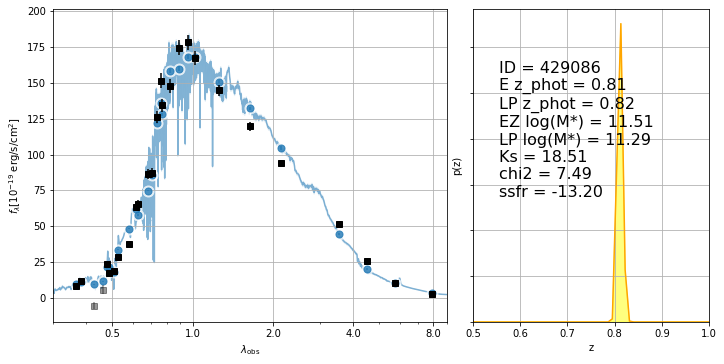

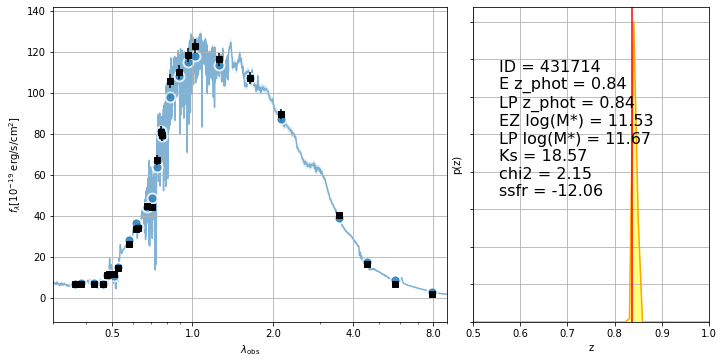

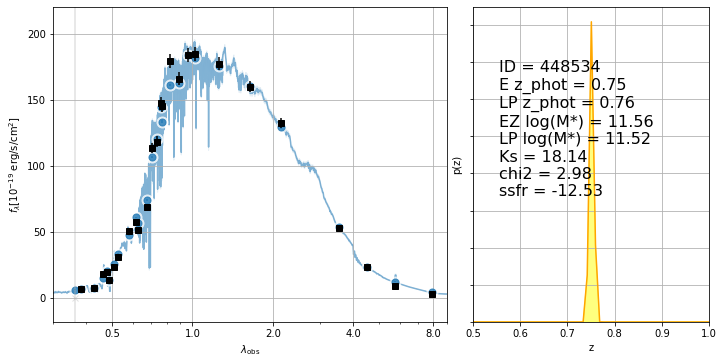

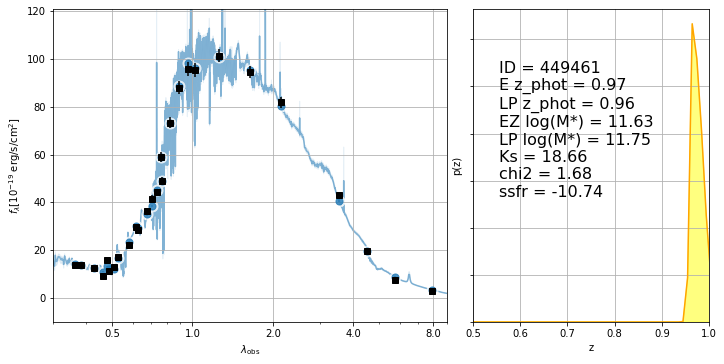

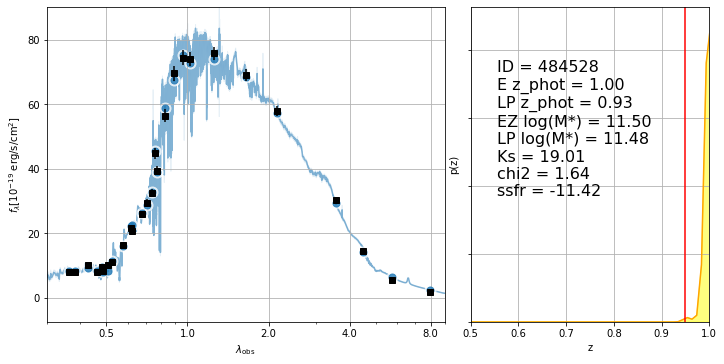

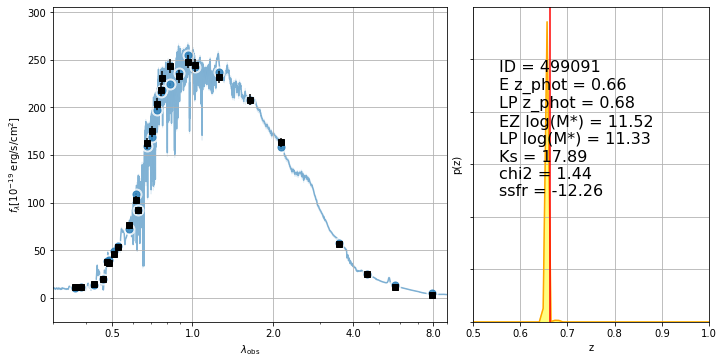

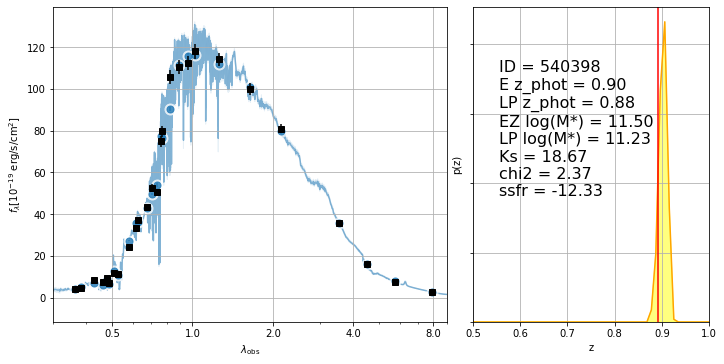

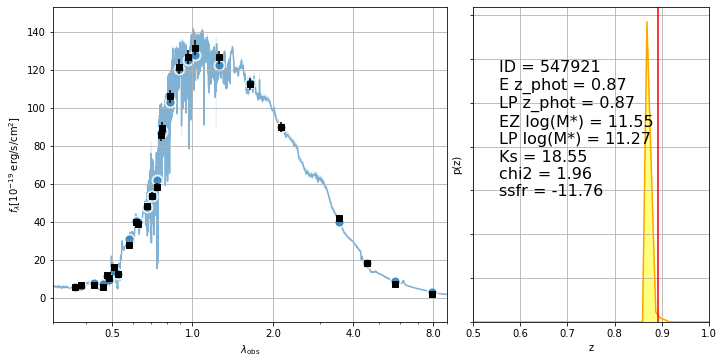

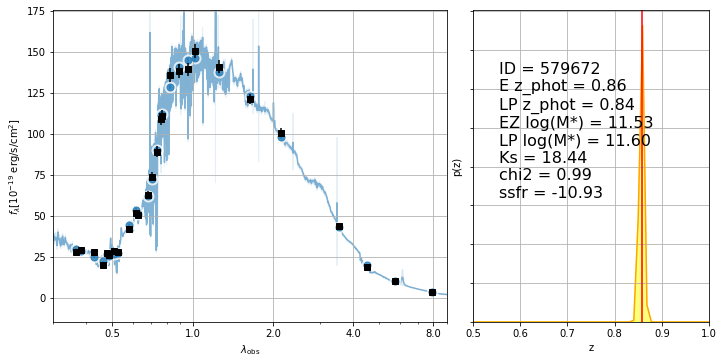

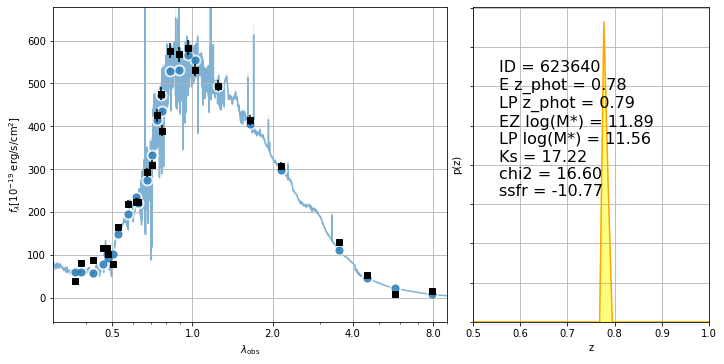

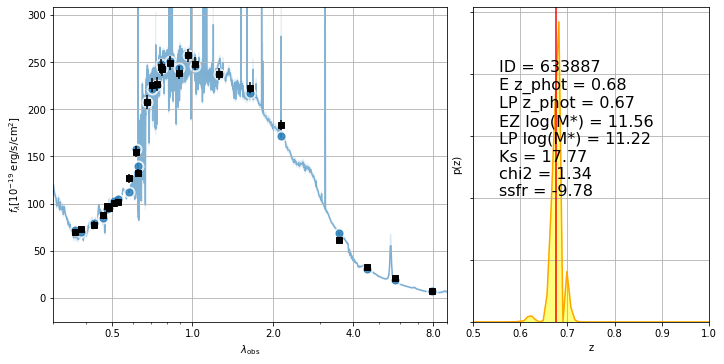

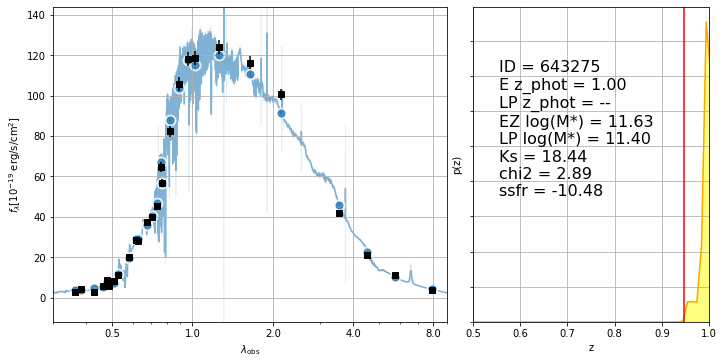

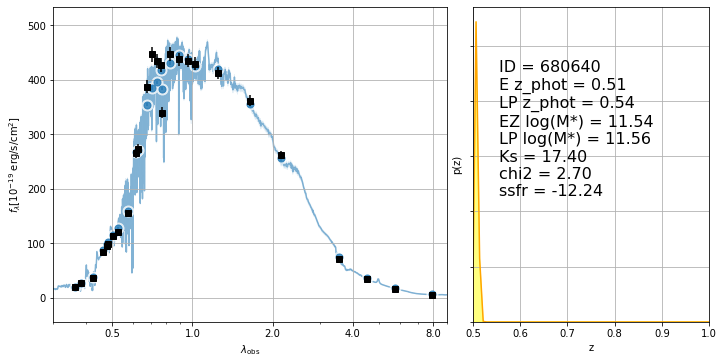

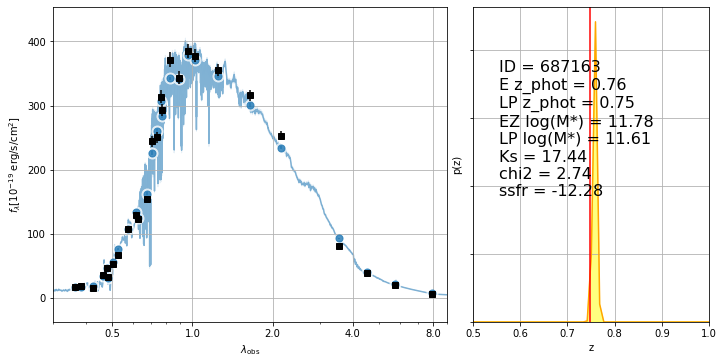

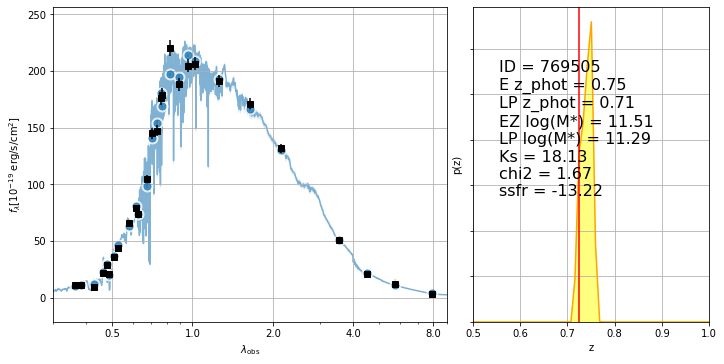

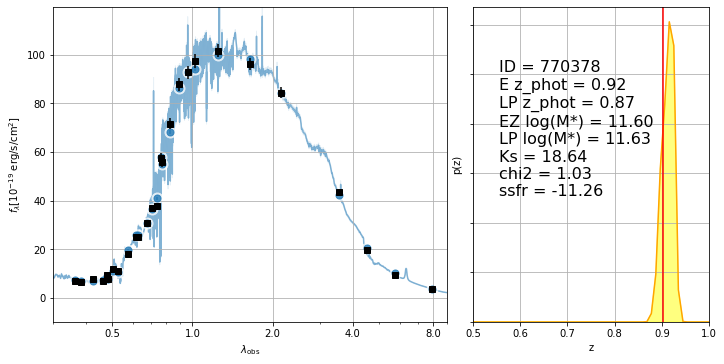

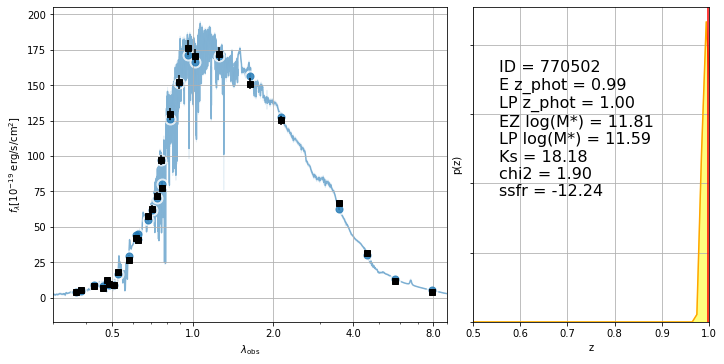

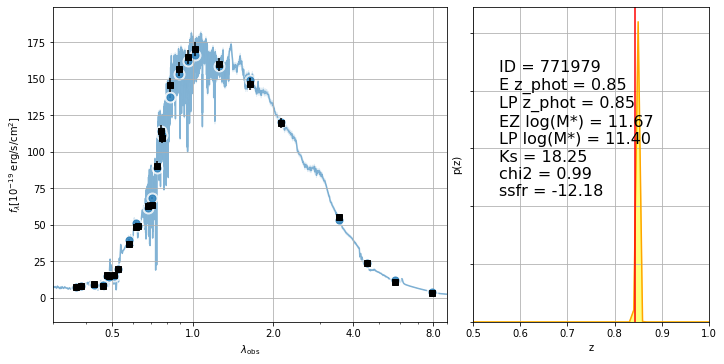

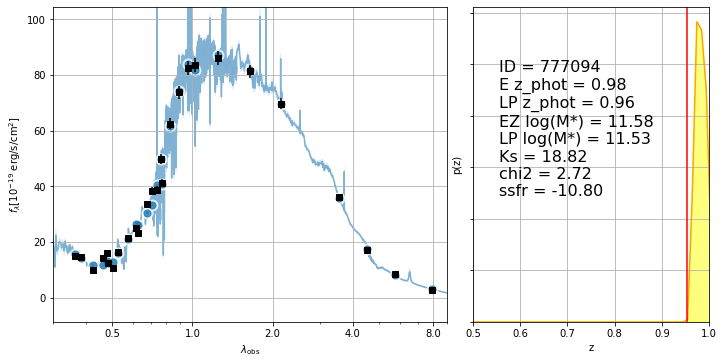

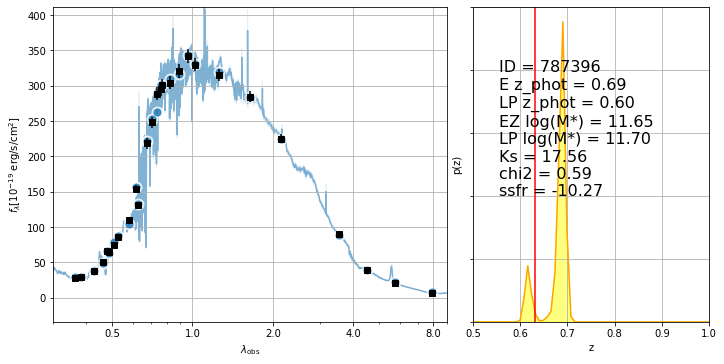

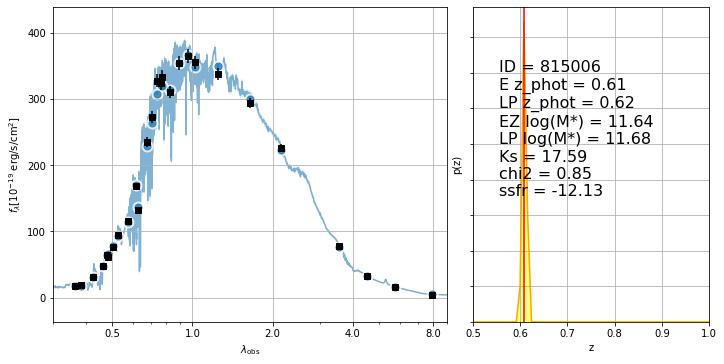

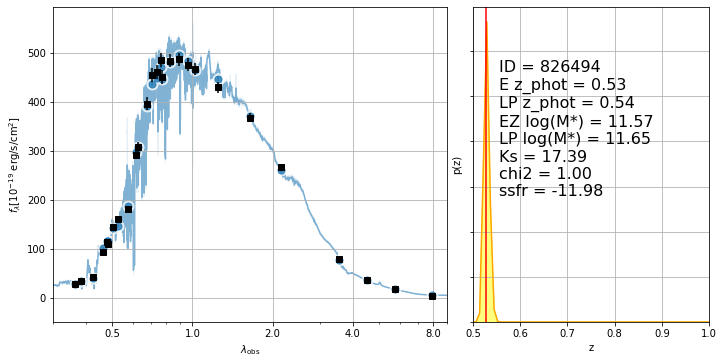

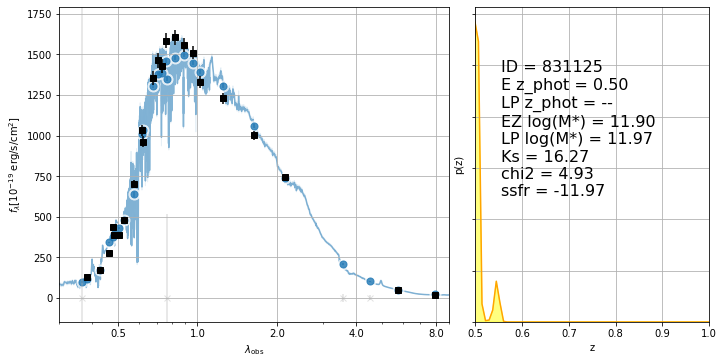

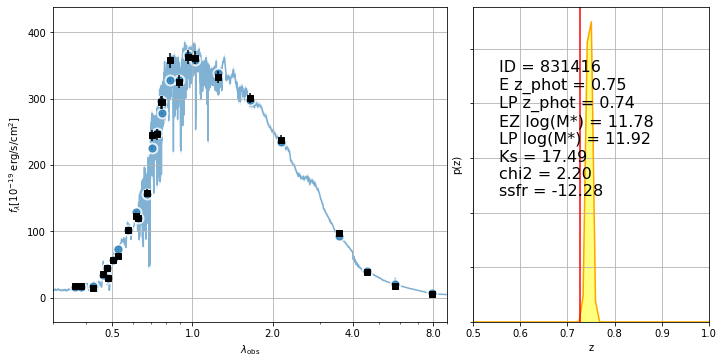

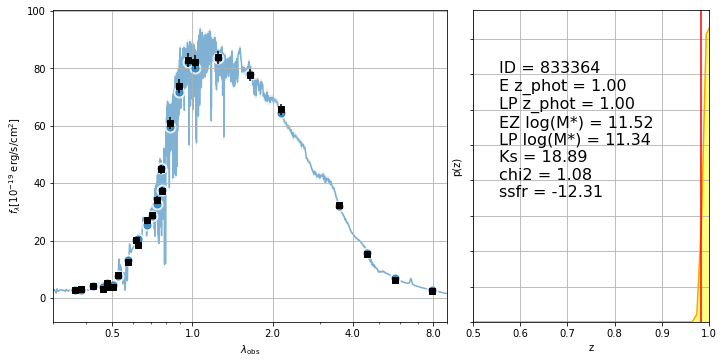

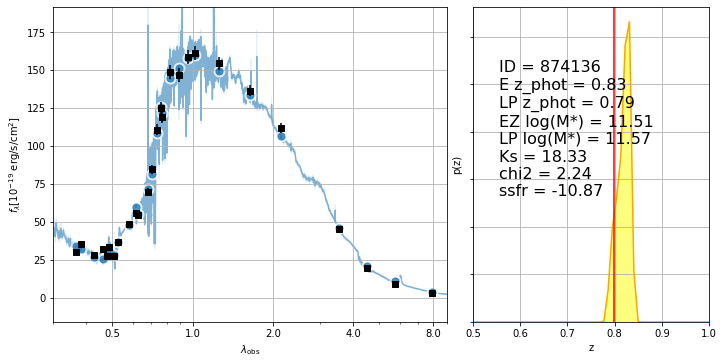

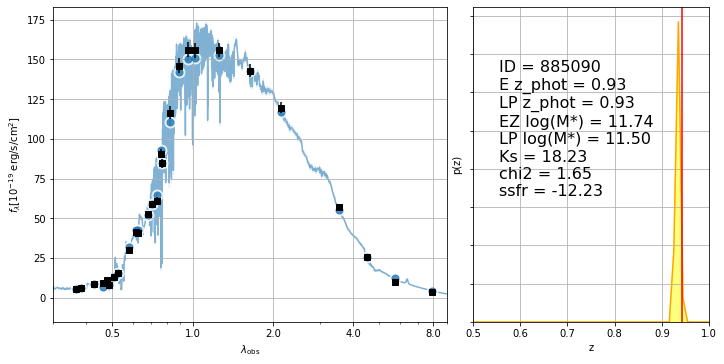

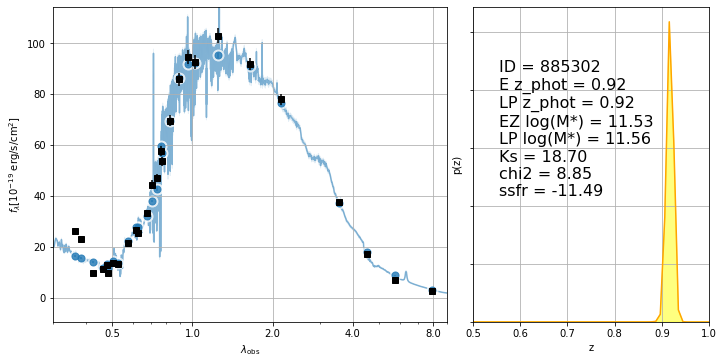

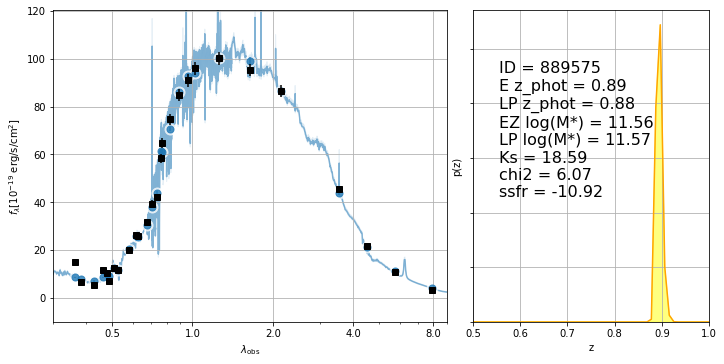

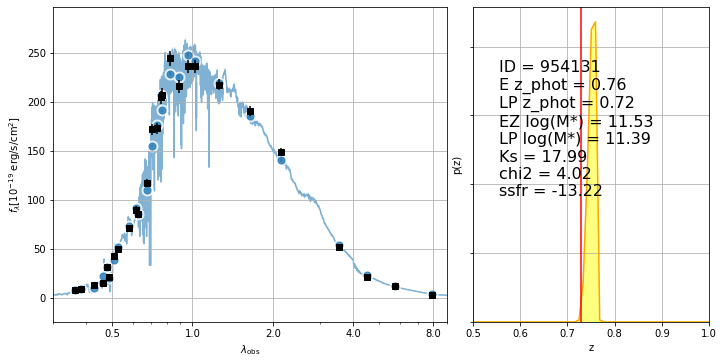

In [13]:
#np.array([711641,]))

ids = cat[qsel]['ID']
kmag = cat[qsel]['UVISTA_Ks_MAG']
zs = cat[qsel]['ez_z_phot']
ezm = cat[qsel]['ez_mass']
lpz = cat[qsel]['lp_zBEST']
lpm = cat[qsel]['lp_mass_best']
chi = cat[qsel]['ez_z_phot_chi2']/cat[qsel]['ez_nusefilt']
ssfr = cat[qsel]['ssfr']

for ii,z,m,z2,m2,k,c,c0 in zip(ids,zs,ezm,lpz,lpm,kmag,chi,ssfr):
    _ = self.show_fit(ii,show_fnu=False,zr=(zlo,zhi),figsize=(10,5),show_components=False,add_label=False)
    fig = plt.gcf()
    ax = fig.axes[1]
    ax2 = fig.axes[0]
    #ax2.set_ylim(0,5)
    
    plt.text(x = 0.11, y = .4, \
           s = f'ID = {ii}'
            '\n'                                                        
            f'E z_phot = {z:.2f}'
            '\n'
            f'LP z_phot = {z2:.2f}'
            '\n'
            f'EZ log(M*) = {m:.2f}'
           '\n'
            f'LP log(M*) = {m2:.2f}'
           '\n'
           f'Ks = {k:.2f}'
            '\n'
           f'chi2 = {c:.2f}'
            '\n'
           f'ssfr = {c0:.2f}',fontsize=16,
           transform=ax.transAxes)

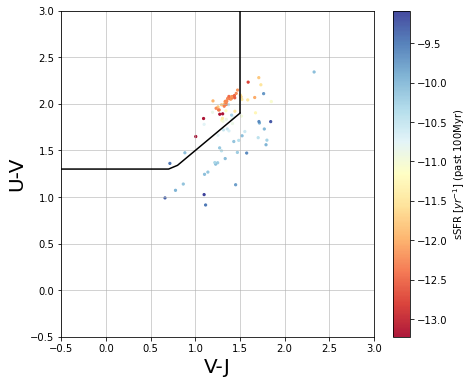

In [14]:
uvj(cat[fsel])

# Starting  here I am adapting the code
## my selection

In [15]:
from astropy.table import Table
from tabulate import tabulate
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9 as cosmo
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import numpy as np
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308)
import math
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata.utils import Cutout2D
from scipy.stats import bootstrap
import matplotlib
def obs_vol(redshift,angulardistance): #assumes square fov in deg
    d_A1 = cosmo.angular_diameter_distance(z=redshift)
    d_A2 = cosmo.luminosity_distance(z=redshift)
    theta = (angulardistance*u.degree).to(u.rad)
    distance_Mpc = (theta * d_A1).to(u.Mpc, u.dimensionless_angles()) # unit is Mpc only now
    volume = distance_Mpc**2*d_A2/3
    return volume

def actual_size(redshift,obs_size):
    d_A1 = cosmo.angular_diameter_distance(z=redshift)
    theta = (obs_size/3600*u.degree).to(u.rad)
    size_kpc = (theta * d_A1).to(u.kpc, u.dimensionless_angles())
    return size_kpc

def uvj_withparentsample(cat,Sample,parentsample,save=False):

    labels = { 'z' :r'$z_{phot}$', 
         'mass' : r'Stellar mass [$M_{\odot}$]',
         'ssfr': r'sSFR [$yr^{-1}$] (past 100Myr)',
          'sfr': r'SFR [$M_{\odot}yr^{-1}$]',
              'age':'Age [Gyr]',
         'fsize': 13}


    plt.figure(figsize=(7,6),dpi=100)
    plt.scatter(cat['vj'][parentsample],cat['uv'][parentsample],\
                    color='lightgrey',\
                s=5, alpha=0.9)
    sc = plt.scatter(cat[Sample]['vj'],cat[Sample]['uv'],\
                    c=cat[Sample]['lp_age']/1e9,cmap='RdYlBu_r',\
                s=5, alpha=0.9)

    cb = plt.colorbar(sc)
    cb.set_label(labels['age'])

    plt.xlabel('V-J',fontsize=labels['fsize'])
    plt.ylabel('U-V',fontsize=labels['fsize'])

    plt.grid(alpha=0.7)

    plt.xlim(-0.5,3)
    plt.ylim(-0.5,3)

    vj = np.arange(-1,1.6,0.1)
    uv = [sep_line(v) for v in vj]
    sep_x = np.arange(-0.5,1.05,0.01)
    sep_y = -1.25*sep_x+2.85
    plt.vlines(x=1.5, ymin=1.9,ymax = 3,color='black')
    plt.plot(sep_x,sep_y,color='black',ls='dotted')
    plt.plot(vj,uv,c='black')
    
    if save:
        plt.savefig('uvj-test.pdf')
def lower_mass(Sample):
    mass=12
    while mass>9:
        mass_sample = Sample & (cat["ez_mass"]>mass)
        if (np.sum(mass_sample)/np.sum(Sample))>0.95: 
            break
        else: mass=mass-0.1
    return mass

def log_complete(z,a,b):
    return a+b*np.log10(z)

def weaver_complete(z):
    return -3.79e8*(1+z)+2.98e8*(1+z)**2

def get_stamp(RA,DEC,width):#RA,DEC in deg
    center_degree = SkyCoord(ra=RA,dec=DEC,unit=u.deg)
    center_pixel = w.world_to_pixel(center_degree)
    stamp = Cutout2D(DASH_image,center_pixel,(width,width))
    
    return stamp

def Bootstrap(data,data_err):
    data = np.array(data)
    data_err = np.array(data_err)
    stds=np.array([])
    iteration = 100#len(data)
    for I in range(0,iteration):
        random_Data_err = np.ones(len(data))
        shifted_data = np.ones(len(data))
        random_Data = np.array(np.random.choice(data,size=len(data)))
        
                                  
        for k in range(0,len(random_Data)):
            random_Data_err[k] = data_err[np.where(data==random_Data[k])][0]
            shifted_data[k]= random_Data[k] + np.random.normal(random_Data[k],random_Data_err[k],1)*random_Data_err[k]
        
        std = np.std(shifted_data)
        stds= np.append(stds,std)
    return np.std(stds)

## include 3DDASH

In [16]:
dash_morph_file = "/Users/clausen/Documents/jupyter/research/3ddash/hlsp_cosmos-dash_hst_wfc3_cosmos_f160w_v1.3_morph-cat.txt"
uvista_id,RA_dash,DEC_dash,use_flag_dash, mag_galfit_dash,flag_deb = np.loadtxt(dash_morph_file,usecols = (0,1,2,3,6,23),unpack = True)
dash_re,dash_re_err,dash_axisratio,dash_axisratio_err = np.loadtxt(dash_morph_file,usecols = (7,8,11,12),unpack = True)

UvistaId,lmass_f814w,z_f814w,flag_f814w,r_e_arc_f814w,r_e_kpc_f814w,mag_f814w,n_f814w,ba_f814w,snr_f814w,\
    f_f814w,e_f814w,chi_f814w,chi_nu,pa_f814w,x_f814w,y_f814w,ra_f814w,dec_f814w = \
    np.loadtxt('/Users/clausen/Documents/jupyter/research/3ddash/galout.dat',unpack=True)

dash_image_filename = '/Users/clausen/Documents/jupyter/research/3ddash/hlsp_cosmos-dash_hst_wfc3_cosmos_f160w_v1.2.10_drz-sci.fits'
fn = get_pkg_data_filename(dash_image_filename)
f = fits.open(fn)
w = WCS(f[0].header)
DASH_image = fits.open(fn)[0].data


In [17]:
#crossmatching cosmos with 3ddash
dash_coordinates = SkyCoord(ra=RA_dash*u.degree,dec=DEC_dash*u.degree)
cosmos_coordinates = SkyCoord(ra=cat["ALPHA_J2000"],dec=cat["DELTA_J2000"],unit=u.deg)

dash_id, d2d,d3d = cosmos_coordinates.match_to_catalog_sky(dash_coordinates) #every element in cosmos gets mathed id in dash,2d and 3d seperation


In [18]:
#test crossmatching via matching limits
max_sep_for_match = 4*10**-4*u.deg #use this value since number of dash_mathes approx. number of unique dash_ids
zlow = 0.5
zhigh = 4
mlow = 10.6
mhigh = 12


#add dash keys to cosmos catalog

cat["dash_id"] = dash_id
cat['Uvista_id'] = uvista_id[dash_id]
cat["RA_dash"] = RA_dash[dash_id]
cat["DEC_dash"] = DEC_dash[dash_id]
cat["use_flag_dash"] = use_flag_dash[dash_id]
cat["mag_galfit_dash"] = mag_galfit_dash[dash_id]
cat["flag_deb_dash"] = flag_deb[dash_id]
cat["seperation_cosmos_dash_match"] = d2d

cat["dash_re"]=dash_re[dash_id]
cat["dash_re_err"]=dash_re_err[dash_id]
cat["dash_axisratio"]=dash_axisratio[dash_id]
cat["dash_axisratio_err"]=dash_axisratio_err[dash_id]


In [19]:
cat["dash_f814w_Uvista"] =np.empty(len(cat))
cat["dash_f814w_re_kpc"] =np.empty(len(cat))
cat["dash_f814w_re_kpc_err"] =np.empty(len(cat))
cat["dash_f814w_flag"] =np.empty(len(cat))
#add F814W dash data
for Id in range(0,len(UvistaId)):
    idx = np.where(cat['Uvista_id']==UvistaId[Id])
    cat['dash_f814w_flag'][idx]= flag_f814w[Id]
    cat["dash_f814w_re_kpc"][idx]=r_e_kpc_f814w[Id]
    cat["dash_f814w_re_kpc_err"][idx]=r_e_kpc_f814w[Id]

of the selected 1210 quiescent galaxies 1052 are old and 158 are young


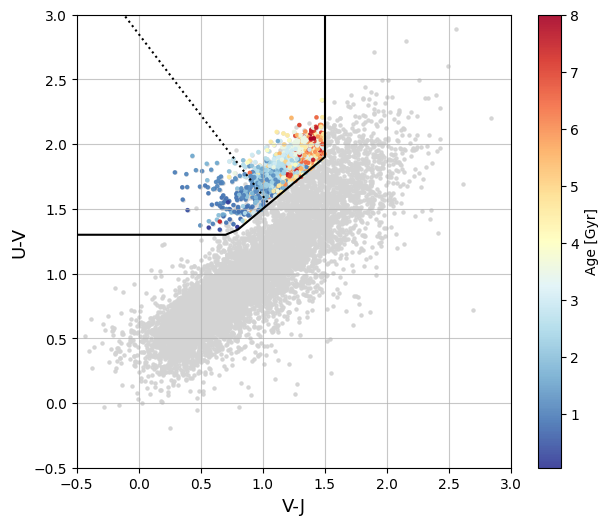

In [20]:
dash_matches=(cat["seperation_cosmos_dash_match"]<max_sep_for_match)
#quiescent selection
sample = (cat['FLAG_COMBINED']==0) & \
        ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & \
        (cat['UVISTA_Ks_MAG']<25.) \
        & (cat['STAR_FLAG']==0) \
        & (cat['ez_z_phot']>zlow)& \
        (cat['ez_z_phot']<zhigh) & \
        dash_matches \
        & (cat["use_flag_dash"]== 1) \
        & (cat["flag_deb_dash"]==0)

w_o_masscut_quiescent_sample = sample & sel_uvj(cat)        
quiescent_sample = sample & sel_uvj(cat) & (cat['ez_mass']>10.4)
old_quiescent_sample = quiescent_sample & (np.invert((cat["uv"]< (-1.25*cat['vj']+2.85))))
young_quiescent_sample = quiescent_sample & (cat["uv"]< (-1.25*cat['vj']+2.85))

                                           
uvj_withparentsample(cat,quiescent_sample,sample)
#plt.title(str(np.sum(old_quiescent_sample))+" old and "
#      +str(np.sum(young_quiescent_sample))+" young quiescent galaxies ",fontsize=20)

#plt.savefig('Sample_color_age.png')
starforming_sample = sample & (np.invert(sel_uvj(cat))) 
missing = sample & ( np.invert(sel_uvj(cat))) & (np.invert(np.invert(sel_uvj(cat))))

print("of the selected "+str(np.sum(quiescent_sample))+" quiescent galaxies " \
      + str(np.sum(old_quiescent_sample))+" are old and "
      +str(np.sum(young_quiescent_sample))+" are young")

#uvista_id = cat['Uvista_id'][quiescent_sample]
#np.savetxt('Uvista_Ids_of_galaxies.txt',uvista_id)
#print(len(uvista_id))

## creating the numberdensity plot

In [21]:
count_q_o, z_q_o,bars_qosample = plt.hist(cat["ez_z_phot"][old_quiescent_sample])
count_q_y, z_q_y, bars_qysample = plt.hist(cat["ez_z_phot"][young_quiescent_sample])
plt.close()
z_o_q = (z_q_o[1:]+z_q_o[:-1])/2
Volume_o_q = obs_vol(z_q_o[1:],0.66)-obs_vol(z_q_o[:-1],0.66)#in Mpc^3
number_density_per_volume_o_q = count_q_o/Volume_o_q

z_y_q = (z_q_y[1:]+z_q_y[:-1])/2
Volume_y_q = obs_vol(z_q_y[1:],0.66)-obs_vol(z_q_y[:-1],0.66)#in Mpc^3
number_density_per_volume_y_q = count_q_y/Volume_y_q

z_o_q_err = (z_q_o[1:]-z_q_o[:-1])/2
z_y_q_err = (z_q_y[1:]-z_q_y[:-1])/2

In [22]:
from astropy.cosmology import z_at_value
def get_z(lookbacktime):
    return z_at_value(cosmo.lookback_time,lookbacktime*u.Gyr).value
def get_lookback(z):
    return cosmo.lookback_time(z).value
get_z(2)


0.1546788147238684

/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/1648810625.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(time_o_q,number_density_per_volume_o_q,yerr=n_q_o_err,xerr= time_o_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/1648810625.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err,\


10 10
11 10


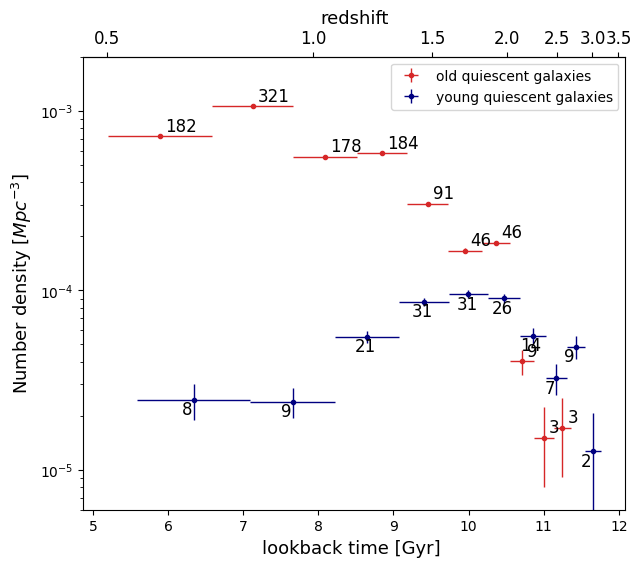

In [23]:
n_q_o_err = (np.sqrt(((count_q_o)/count_q_o)**2+((count_q_o-count_q_o**2)/count_q_o**2-1/count_q_o)**2))/Volume_o_q#poissonfehler und cosmische Variance
n_q_y_err = (np.sqrt(((count_q_y)/count_q_y)**2+((count_q_y-count_q_y**2)/count_q_y**2-1/count_q_y)**2))/Volume_o_q#poissonfehler und cosmische Variance

figure,ax1=plt.subplots(figsize=(7,6),dpi=100) 
plt.rcParams.update({'font.size': 12})

time_q_o = cosmo.lookback_time(z_q_o).value#binabschnitte
time_o_q = (time_q_o[1:]+time_q_o[:-1])/2#-(time_q_o[1:]-time_q_o[:-1])/2#bin mittelwerte
time_o_q_err = (time_o_q-time_q_o[:-1])
ax1.errorbar(time_o_q,number_density_per_volume_o_q,yerr=n_q_o_err,xerr= time_o_q_err,\
             color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=0,elinewidth=1)#
for i, txt in enumerate(count_q_o): ax1.annotate(int(txt), (time_o_q[i], number_density_per_volume_o_q[i].value),xytext=(5,5),textcoords="offset pixels")

time_q_y = cosmo.lookback_time(z_q_y).value#binabschnitte
#time_y_q = cosmo.lookback_time(z_y_q).value#bin mittelwerte
time_y_q = (time_q_y[:-1]+time_q_y[1:])/2#-(time_q_y[1:]-time_q_y[:-1])/2#bin mittelwerte
time_y_q_err = (time_y_q-time_q_y[:-1])
print(len(time_y_q_err),len(time_y_q))
#time_y_q_err = time_y_q-time_q_y[1:]
ax2 = ax1.secondary_xaxis('top', functions=(get_z,get_lookback))
ax2.set_xlabel('redshift',fontsize=13)

ax1.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err,\
             color="navy",fmt='.k',label="young quiescent galaxies",capsize=0,elinewidth=1)
for i, txt in enumerate(count_q_y): ax1.annotate(int(txt), (time_y_q[i], number_density_per_volume_y_q[i].value),xytext=(-12,-15),textcoords="offset pixels")


plt.yscale('log')
plt.ylim(6e-6,2e-3)
ax1.set_xlabel("lookback time [Gyr] ",fontsize=13)

plt.ylabel(r"Number density [$Mpc^{-3}$]",fontsize=13)
plt.legend(fontsize=10)
figure.savefig('Numberdensity_dash_mass10_4.png')
print(len(time_q_y),len(time_y_q))

## creating same plot but with only Cosmos2020

of the selected 9606 quiescent galaxies 7081 are old and 2525 are young


/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2705293695.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax4.errorbar(time_o_q_c,number_density_per_volume_o_q_c,yerr=n_q_o_c_err,xerr= time_o_q_c_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2705293695.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax4.errorbar(time_y_q_c,number_density_per_volume_y_q_c,yerr=n_q_y_c_err,xerr= time_y_q_c_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2705293695.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax4.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err

[ 6.3415155  7.658683   8.645629   9.40245    9.99524   10.468456
 10.852627  11.16917   11.433428  11.656609 ]


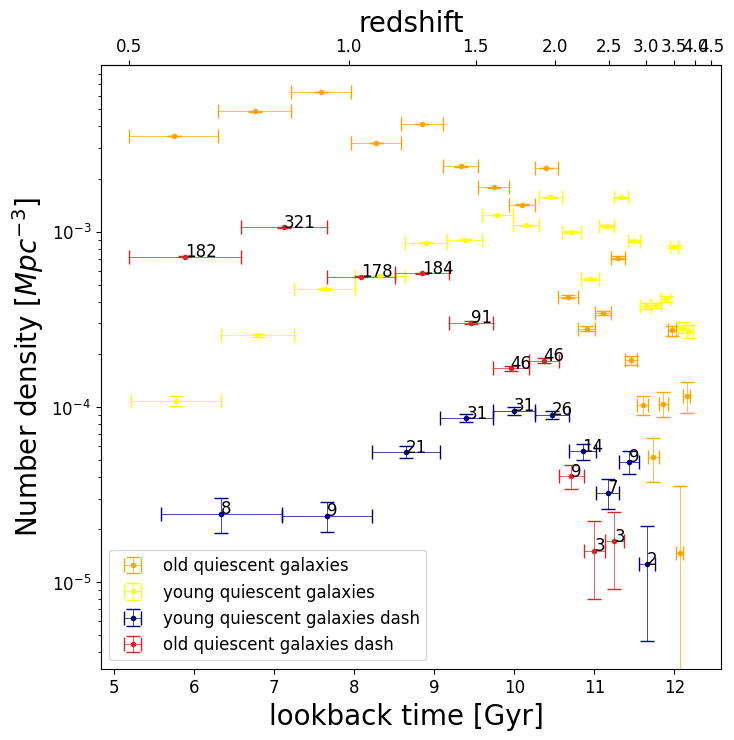

In [24]:
#remake numberdensity plot with only cosmos
zlow_c = 0.5
zhigh_c = 4
mlow = 10.4
sample_c = (cat['FLAG_COMBINED']==0) & \
        ((cat['ez_z_phot_chi2']/cat['ez_nusefilt'])<20.) & \
        (cat['UVISTA_Ks_MAG']<25.) \
        & (cat['STAR_FLAG']==0) \
        & (cat['ez_z_phot']>zlow_c)& \
        (cat['ez_z_phot']<zhigh_c) 

quiescent_sample_c = sample_c & sel_uvj(cat) & (cat["ez_mass"]> mlow)
old_quiescent_sample_c = quiescent_sample_c & (np.invert((cat["uv"]< (-1.25*cat['vj']+3))))
young_quiescent_sample_c = quiescent_sample_c & (cat["uv"]< (-1.25*cat['vj']+3))

#uvj_withparentsample(cat,quiescent_sample_c,sample_c)


print("of the selected "+str(np.sum(quiescent_sample_c))+" quiescent galaxies " \
      + str(np.sum(old_quiescent_sample_c))+" are old and "
      +str(np.sum(young_quiescent_sample_c))+" are young")

count_q_o_c, z_q_o_c,bars_qosample_c = plt.hist(cat["ez_z_phot"][old_quiescent_sample_c],bins=20)
count_q_y_c, z_q_y_c, bars_qysample_c = plt.hist(cat["ez_z_phot"][young_quiescent_sample_c],bins=20)
plt.close()

z_o_q_c = (z_q_o_c[1:]+z_q_o_c[:-1])/2
Volume_o_q_c = obs_vol(z_q_o_c[1:],0.66)-obs_vol(z_q_o_c[:-1],0.66)  #in Mpc^3
number_density_per_volume_o_q_c = count_q_o_c/Volume_o_q_c

z_y_q_c = (z_q_y_c[1:]+z_q_y_c[:-1])/2
Volume_y_q_c = obs_vol(z_q_y_c[1:],0.66)-obs_vol(z_q_y_c[:-1],0.66)  #in Mpc^3
number_density_per_volume_y_q_c = count_q_y_c/Volume_y_q_c

z_o_q_c_err = (z_q_o_c[1:]-z_q_o_c[:-1])/2
z_y_q_c_err = (z_q_y_c[1:]-z_q_y_c[:-1])/2

time_q_o_c = cosmo.lookback_time(z_q_o_c).value   #binabschnitte
time_o_q_c = (time_q_o_c[1:]+time_q_o_c[:-1])/2
time_o_q_c_err = (time_o_q_c-time_q_o_c[:-1])

time_q_y_c = cosmo.lookback_time(z_q_y_c).value   #binabschnitte
time_y_q_c = (time_q_y_c[1:]+time_q_y_c[:-1])/2
time_y_q_c_err = (time_y_q_c-time_q_y_c[:-1])

n_q_o_c_err = (np.sqrt(((count_q_o_c)/count_q_o_c)**2+((count_q_o_c-count_q_o_c**2)/count_q_o_c**2-1/count_q_o_c)**2))/Volume_o_q_c#poissonfehler und cosmische Variance
n_q_y_c_err = (np.sqrt(((count_q_y_c)/count_q_y_c)**2+((count_q_y_c-count_q_y_c**2)/count_q_y_c**2-1/count_q_y_c)**2))/Volume_o_q_c#poissonfehler und cosmische Variance

figure,ax4=plt.subplots(figsize=(8,8),dpi=100) 
plt.rcParams.update({'font.size': 12})



ax4.errorbar(time_o_q_c,number_density_per_volume_o_q_c,yerr=n_q_o_c_err,xerr= time_o_q_c_err,\
             color="orange",fmt='.k',label="old quiescent galaxies",capsize=5,elinewidth=0.5)#
#for i, txt in enumerate(count_q_o_c): ax4.annotate(int(txt), (time_o_q_c[i], number_density_per_volume_o_q_c[i].value))


ax5 = ax4.secondary_xaxis('top', functions=(get_z,get_lookback))
ax5.set_xlabel('redshift',fontsize=20)

ax4.errorbar(time_y_q_c,number_density_per_volume_y_q_c,yerr=n_q_y_c_err,xerr= time_y_q_c_err,\
             color="yellow",fmt='.k',label="young quiescent galaxies",capsize=5,elinewidth=0.5)
#for i, txt in enumerate(count_q_y_c): ax4.annotate(int(txt), (time_y_q_c[i], number_density_per_volume_y_q_c[i].value))

ax4.errorbar(time_y_q,number_density_per_volume_y_q,yerr=n_q_y_err,xerr= time_y_q_err,\
             color="navy",fmt='.k',label="young quiescent galaxies dash",capsize=5,elinewidth=0.5)
for i, txt in enumerate(count_q_y): ax4.annotate(int(txt), (time_y_q[i], number_density_per_volume_y_q[i].value))
ax4.errorbar(time_o_q,number_density_per_volume_o_q,yerr=n_q_o_err,xerr= time_o_q_err,\
             color="tab:red",fmt='.k',label="old quiescent galaxies dash",capsize=5,elinewidth=0.5)#
for i, txt in enumerate(count_q_o): ax4.annotate(int(txt), (time_o_q[i], number_density_per_volume_o_q[i].value))


plt.yscale('log')
#plt.ylim(6e-6,2e-3)
ax4.set_xlabel("lookback time [Gyr] ",fontsize=20)

plt.ylabel(r"Number density [$Mpc^{-3}$]",fontsize=20)
plt.legend()
figure.savefig('Numberdensity_dashCosmos.png')
print(time_y_q)

## Size evolution plot

For the size evolution I am calculating two different errors:
    -the standard deviation from the scatter of the different sizes within a certain redshift bin
    -the intrinsic error (sqrt(scat^2-boot^2))

as it turns out there is a galaxy (catalog id:812176-1, dash_id:217976) whose error in size is half the size itself!
that makes the bootstrapped error bigger than the error derived from scattering
therefore this specific galaxy is excluded from the bootstrap sampeling (apart from that there seems to be nothing wrong with it) 

In [25]:
#calculate size

size_o_q = actual_size(cat['ez_z_phot'][old_quiescent_sample],cat['dash_re'][old_quiescent_sample]).value
size_y_q = actual_size(cat['ez_z_phot'][young_quiescent_sample],cat['dash_re'][young_quiescent_sample]).value

#bin sizes and calculate average
size_bin_o_q = np.array([])
size_bin_y_q = np.array([])
size_bin_o_q_err = np.array([])
size_bin_y_q_err = np.array([])
axratio_bin_o_q = np.array([])
axratio_bin_y_q = np.array([])
axratio_bin_o_q_err = np.array([])
axratio_bin_y_q_err = np.array([])
size_bin_y_q_err_intrinsic = np.array([])
size_bin_o_q_err_intrinsic = np.array([])
for i in range(0,len(z_y_q)):
    
    sizes_y = young_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&\
              (cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i])) 
    
    if i == 4:  #if clauss needed to extract weird galaxy from being bootstrapped
        sizes_y_for_boot = sizes_y & (cat['dash_id'] != 217976)
    else:
        sizes_y_for_boot=sizes_y
    
    
    size_bin_y_q = np.append(size_bin_y_q,np.mean(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value))
    
    size_boot_y_err = Bootstrap(actual_size(cat['ez_z_phot'][sizes_y_for_boot],cat['dash_re'][sizes_y_for_boot]).value,\
                                actual_size(cat['ez_z_phot'][sizes_y_for_boot],cat['dash_re_err'][sizes_y_for_boot]).value)#/(np.sqrt(np.sum(sizes_y)))
    size_scat_y_q_err = np.std(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)/(np.sqrt(np.sum(sizes_y)))
    
    size_bin_y_q_err = np.append(size_bin_y_q_err,size_scat_y_q_err)
    size_bin_y_q_err_intrinsic = np.append(size_bin_y_q_err_intrinsic,\
                                 np.sqrt( (size_scat_y_q_err*(np.sqrt(np.sum(sizes_y))))**2-size_boot_y_err**2 ))
    
    
    axratio_bin_y_q = np.append(axratio_bin_y_q,np.mean(cat['dash_axisratio'][sizes_y]))
    axratio_bin_y_q_err = np.append(axratio_bin_y_q_err,np.std(cat['dash_axisratio'][sizes_y])/(np.sqrt(np.sum(sizes_y))))
    
    sizes_o = old_quiescent_sample & (cat['ez_z_phot']>(z_o_q[i]-z_o_q_err[i]))\
                &(cat['ez_z_phot']<(z_o_q[i]+z_o_q_err[i]))
    
    size_bin_o_q = np.append(size_bin_o_q,np.mean(actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value))
    
        
    size_boot_o_err = Bootstrap(actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value,\
                                actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re_err'][sizes_o]).value)#/(np.sqrt(np.sum(sizes_o)))
    size_scat_o_q_err = np.std(actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value)/(np.sqrt(np.sum(sizes_o)))
    size_bin_o_q_err = np.append(size_bin_o_q_err,size_scat_o_q_err)
    size_bin_o_q_err_intrinsic = np.append(size_bin_o_q_err_intrinsic,\
                                 np.sqrt( (size_scat_o_q_err*(np.sqrt(np.sum(sizes_o))))**2-size_boot_o_err**2 ))    
    axratio_bin_o_q = np.append(axratio_bin_o_q,np.mean(cat['dash_axisratio'][sizes_o]))
    axratio_bin_o_q_err = np.append(axratio_bin_o_q_err,(np.std(cat['dash_axisratio'][sizes_o]))/(np.sqrt(np.sum(sizes_o))))
    


# note:
#        nan values for old quiescent galaxies in  idx = 7,9 because no old quiescent galaxies there

In [26]:
i=4
sizes_y = young_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&\
          (cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i]))
mean_size= np.mean(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)
std_size = np.std(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)
std = np.sqrt(np.sum((actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value-mean_size)**2)/(np.sum(sizes_y)))

print(std_size,std)

1.652939498796408 1.652939498796408


The following cell's purpose is solely to investigate the 'weird galaxy' aka Bob

In [27]:
# INVESTIGATING GALAXY WITH ATTITUDE
weird = 217976
id_weird = 812176-1 #to use it as selection
#get more data
mag,mag_err,F,F_err = np.loadtxt(dash_morph_file,usecols = (5,6,16,17),unpack = True)

i=4
sizes_y = young_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&\
          (cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i]))
print('weird outlier DashID = 217976:')
print('r_e:',actual_size(cat['ez_z_phot'][sizes_y][-5],cat['dash_re'][sizes_y][-5]).value\
     ,' +- ',actual_size(cat['ez_z_phot'][sizes_y][-5],cat['dash_re_err'][sizes_y][-5]).value)
print('z=',cat['ez_z_phot'][sizes_y][-5])

print('mass=',cat['ez_mass'][sizes_y][-5])
print('mag= ',mag[weird],' +- ',mag_err[weird])
print('F= ',F[weird],' +- ',F_err[weird])
size_boot_y_err = Bootstrap(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value,\
                            actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re_err'][sizes_y]).value)/(np.sqrt(np.sum(sizes_y)))
size_scat_y_q_err = np.std(actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)/(np.sqrt(np.sum(sizes_y)))
#print('sizes:' ,actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value)
#print(size_boot_y_err)
#print(size_scat_y_q_err**2-(size_boot_y_err/(np.sqrt(np.sum(sizes_y))))**2)
print('')
for x in range(0,np.sum(sizes_y)):
    print('ID: ',cat['ID'][sizes_y][x],'dashID: ',cat['dash_id'][sizes_y][x],' r_e:',np.round(actual_size(cat['ez_z_phot'][sizes_y][x],cat['dash_re'][sizes_y][x]).value,4)\
         ,' +- ',np.round(actual_size(cat['ez_z_phot'][sizes_y][x],cat['dash_re_err'][sizes_y][x]).value,4))
    


weird outlier DashID = 217976:
r_e: 9.978882469926644  +-  4.154706413627787
z= 1.7005099
mass= 10.788411027274575
mag=  21.411  +-  0.224531
F=  7.425707  +-  0.572367

ID:  6037 dashID:  22607  r_e: 0.8567  +-  0.0332
ID:  26860 dashID:  113940  r_e: 0.7967  +-  0.0453
ID:  49443 dashID:  28589  r_e: 1.46  +-  0.0545
ID:  62330 dashID:  159611  r_e: 2.6705  +-  0.1643
ID:  138578 dashID:  70731  r_e: 0.852  +-  0.0501
ID:  165532 dashID:  121281  r_e: 0.7793  +-  0.03
ID:  176632 dashID:  40832  r_e: 1.9468  +-  0.0951
ID:  192032 dashID:  167695  r_e: 3.1524  +-  0.3417
ID:  263059 dashID:  94040  r_e: 0.8227  +-  0.0458
ID:  263411 dashID:  214667  r_e: 1.6631  +-  0.0575
ID:  271620 dashID:  11571  r_e: 2.9124  +-  0.0522
ID:  352192 dashID:  109438  r_e: 0.857  +-  0.075
ID:  387134 dashID:  129696  r_e: 1.9212  +-  0.076
ID:  405148 dashID:  169103  r_e: 1.7222  +-  0.0555
ID:  407780 dashID:  109464  r_e: 1.506  +-  0.0605
ID:  412219 dashID:  77450  r_e: 0.9174  +-  0.0555
ID:

/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2920023999.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax6[0].set_ylim(0,10)


[ 6.3415155  7.658683   8.645629   9.40245    9.99524   10.468456
 10.852627  11.16917   11.433428  11.656609 ]


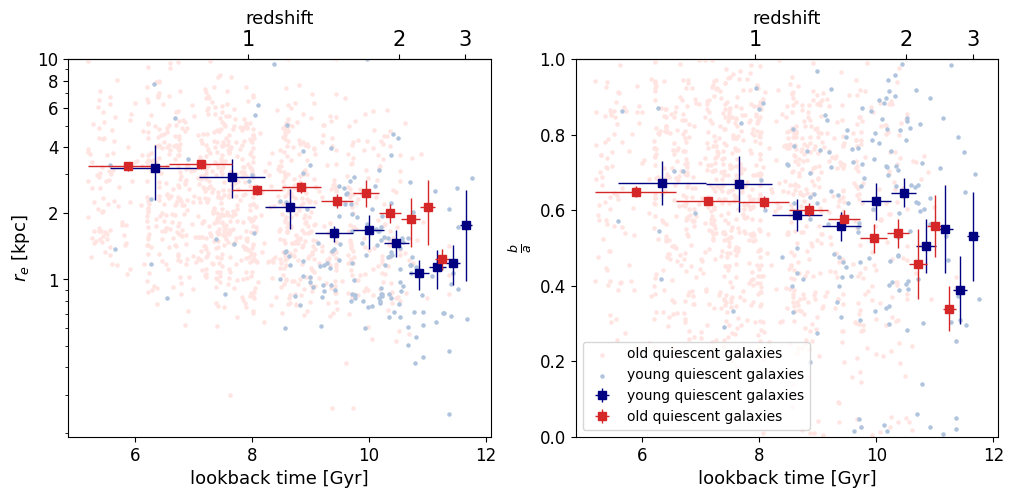

In [28]:
fig,ax6 = plt.subplots(1,2,figsize=(12,5),dpi=100)

plt.rcParams.update({'font.size': 15})
#ax6[0].fill_between(time_o_q,size_bin_o_q+size_bin_o_q_err,size_bin_o_q-size_bin_o_q_err,color='salmon')
#ax6[0].fill_between(time_y_q,size_bin_y_q+size_bin_y_q_err,size_bin_y_q-size_bin_y_q_err,color='cornflowerblue')

ax6[0].scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample]).value,size_o_q,\
               color="mistyrose",label="old quiescent galaxies",s=5)
ax6[0].scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample]).value,size_y_q,\
               color="lightsteelblue",label="young quiescent galaxies",s=5)
ax6[0].errorbar(time_y_q,size_bin_y_q,yerr=size_bin_y_q_err,xerr=time_y_q_err,\
               color="navy",fmt='s',label="young quiescent galaxies",capsize=0,elinewidth=1)
ax6[0].errorbar(time_o_q,size_bin_o_q,yerr=size_bin_o_q_err,xerr=time_o_q_err,\
               color="tab:red",fmt='s',label="old quiescent galaxies",capsize=0,elinewidth=1)
ax7 = ax6[0].secondary_xaxis('top', functions=(get_z,get_lookback))
ax7.set_xlabel('redshift',fontsize=13)

ax6[0].set_yscale('log')
ax6[0].set_yticks([1,2,4,6,8,10])
ax6[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax6[0].set_ylim(0.3,20)
ax6[0].set_ylim(0,10)
ax6[0].set_xlabel('lookback time [Gyr]',fontsize=13)
ax6[0].set_ylabel(r'$r_e$ [kpc]',fontsize=13)


ax6[1].scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample]).value,cat['dash_axisratio'][old_quiescent_sample],\
               color="mistyrose",label="old quiescent galaxies",s=5)
ax6[1].scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample]).value,cat['dash_axisratio'][young_quiescent_sample],\
               color="lightsteelblue",label="young quiescent galaxies",s=5)
ax6[1].errorbar(time_y_q,axratio_bin_y_q,yerr=axratio_bin_y_q_err,xerr=time_y_q_err,\
               color="navy",fmt='s',label="young quiescent galaxies",capsize=0,elinewidth=1)
ax6[1].errorbar(time_o_q,axratio_bin_o_q,yerr=axratio_bin_o_q_err,xerr=time_o_q_err,\
               color="tab:red",fmt='s',label="old quiescent galaxies",capsize=0,elinewidth=1)
ax8 = ax6[1].secondary_xaxis('top', functions=(get_z,get_lookback))
ax8.set_xlabel('redshift',fontsize=13)
ax6[1].legend(fontsize=10)
ax6[1].set_ylim(0,1)
ax6[1].set_xlabel('lookback time [Gyr]',fontsize=13)
ax6[1].set_ylabel(r'$\frac{b}{a}$',fontsize=13)
#ax2[1].legend(fontsize=10)
fig.savefig('sizeevolution.png')
print(time_y_q)

notes on size-evolution graph:
        -make beautiful!

/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2908693759.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax10.errorbar(time_y_q,size_bin_y_q_err_intrinsic,xerr=time_y_q_err,\
/var/folders/_r/sm3l_kwx78bflls9fqvm6zm1b36hfd/T/ipykernel_1198/2908693759.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax10.errorbar(time_o_q,size_bin_o_q_err_intrinsic,xerr=time_o_q_err,\


[2.26629225 0.84251764 1.81025257 0.69685712 1.64657283 1.01365707
 0.59680087 0.54756323 0.59696361 0.93558628] [2.02554949 2.79994982 1.58607643 1.76887902        nan        nan
 1.21565673 1.23035571 0.81199933 0.14516683]


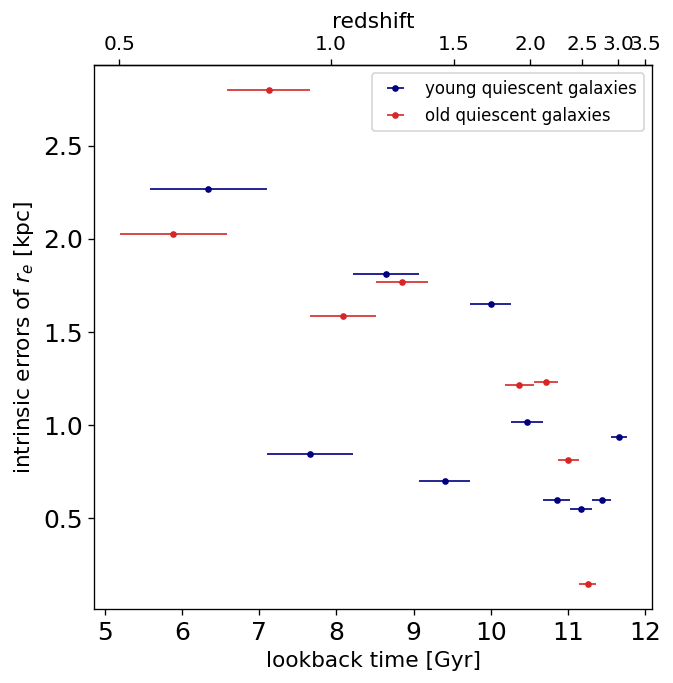

<Figure size 2400x2800 with 0 Axes>

In [29]:
fig,ax10 = plt.subplots(1,1,figsize=(6,6),dpi=120)
plt.figure(figsize=(12,14),dpi=200) 
plt.rcParams.update({'font.size': 12})

ax10.errorbar(time_y_q,size_bin_y_q_err_intrinsic,xerr=time_y_q_err,\
               color="navy",fmt='.k',label="young quiescent galaxies",capsize=0,elinewidth=1)
ax10.errorbar(time_o_q,size_bin_o_q_err_intrinsic,xerr=time_o_q_err,\
               color="tab:red",fmt='.k',label="old quiescent galaxies",capsize=0,elinewidth=1)

ax11 = ax10.secondary_xaxis('top', functions=(get_z,get_lookback))
ax11.set_xlabel('redshift',fontsize=13)

#ax10.set_yscale('log')
ax10.set_xlabel('lookback time [Gyr]',fontsize=13)
ax10.set_ylabel(r'intrinsic errors of $r_e$ [kpc]',fontsize=13)
ax10.legend(fontsize=10)
fig.savefig('errorevolution.png')
print(size_bin_y_q_err_intrinsic,size_bin_o_q_err_intrinsic)

# Compare r_e(f160) to r_e(f814)

In [30]:
re_ratio_y = np.array([])
re_ratio_y_err = np.array([])
re_ratio_o = np.array([])
re_ratio_o_err = np.array([])

for i in range(0,len(z_y_q)):
    sizes_y = young_quiescent_sample & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&\
              (cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i])) & (cat['dash_f814w_flag'] ==0)
    re_ratios_y = actual_size(cat['ez_z_phot'][sizes_y],cat['dash_re'][sizes_y]).value\
                /cat['dash_f814w_re_kpc'][sizes_y]
    re_ratio_y=np.append(re_ratio_y,np.mean(re_ratios_y))
    re_ratio_y_err = np.append(re_ratio_y_err,np.std(re_ratios_y))
    
    sizes_o = young_quiescent_sample & (cat['ez_z_phot']>(z_o_q[i]-z_o_q_err[i]))&\
              (cat['ez_z_phot']<(z_o_q[i]+z_o_q_err[i]))& (cat['dash_f814w_flag'] ==0)
    re_ratios_o = actual_size(cat['ez_z_phot'][sizes_o],cat['dash_re'][sizes_o]).value\
                /cat['dash_f814w_re_kpc'][sizes_o]
    re_ratio_o=np.append(re_ratio_o,np.mean(re_ratios_o))
    re_ratio_o_err = np.append(re_ratio_o_err,np.std(re_ratios_o))
    

/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


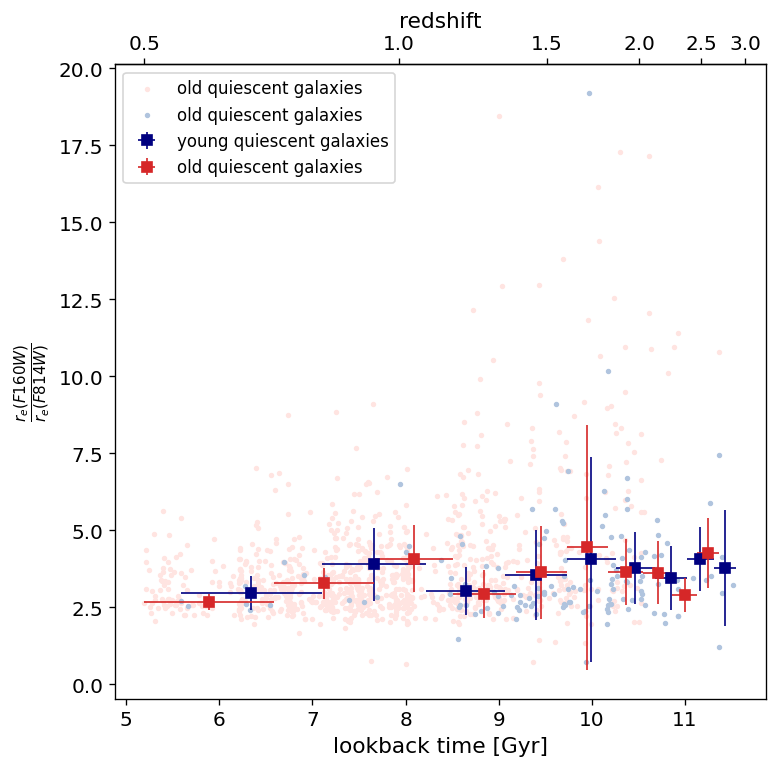

In [31]:
old_quiescent_sample_f814 = old_quiescent_sample & (cat['dash_f814w_flag'] ==0)
young_quiescent_sample_f814 = young_quiescent_sample & (cat['dash_f814w_flag'] ==0)

fig,ax12 = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax12.scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample_f814]).value,\
            actual_size(cat['ez_z_phot'][old_quiescent_sample_f814],cat['dash_re'][old_quiescent_sample_f814]).value
             /cat['dash_f814w_re_kpc'][old_quiescent_sample_f814],\
               color="mistyrose",label="old quiescent galaxies",s=5)
ax12.scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample_f814]).value,\
            actual_size(cat['ez_z_phot'][young_quiescent_sample_f814],cat['dash_re'][young_quiescent_sample_f814]).value
             /cat['dash_f814w_re_kpc'][young_quiescent_sample_f814],\
               color="lightsteelblue",label="old quiescent galaxies",s=5)

ax12.errorbar(time_y_q,re_ratio_y,yerr=re_ratio_y_err,xerr=time_y_q_err,\
               color="navy",fmt='s',label="young quiescent galaxies",capsize=0,elinewidth=1)
ax12.errorbar(time_o_q,re_ratio_o,yerr=re_ratio_o_err,xerr=time_o_q_err,\
               color="tab:red",fmt='s',label="old quiescent galaxies",capsize=0,elinewidth=1)

ax13 = ax12.secondary_xaxis('top', functions=(get_z,get_lookback))
ax13.set_xlabel('redshift',fontsize=13)
ax12.set_xlabel('lookback time [Gyr]',fontsize=13)
ax12.set_ylabel(r'$\frac{r_e (F160W)} {r_e (F814W)}$',fontsize=13)
plt.legend(fontsize=10)
plt.savefig('ref160wtof814wratio.png')
             

# including Tim_Millers Catolg


In [32]:
Tim_ra,Tim_dec,Tim_z,Tim_r_e_light,Tim_r_e_light_err,Tim_r_e_mass,Tim_r_e_mass_err = \
            np.loadtxt('/Users/clausen/Documents/jupyter/research/Miller2022_morph_CANDELs.txt',\
                       usecols=(2,3,4,7,8,9,10),unpack=True)






In [33]:
tim_coordinates = SkyCoord(ra=Tim_ra*u.degree,dec=Tim_dec*u.degree)
cosmos_coordinates = SkyCoord(ra=cat["ALPHA_J2000"],dec=cat["DELTA_J2000"],unit=u.deg)
tim_id, timd2d,timd3d = cosmos_coordinates.match_to_catalog_sky(tim_coordinates) #every element in tim gets mathed id in tim,2d and 3d seperation

cat["seperation_cosmos_tim_match"] = timd2d
cat['tim_id'] = tim_id
cat['tim_re_light']=Tim_r_e_light[tim_id]
cat['tim_re_light_err']=Tim_r_e_light_err[tim_id]
cat['tim_re_mass']=Tim_r_e_mass[tim_id]
cat['tim_re_mass_err']=Tim_r_e_mass_err[tim_id]
cat['tim_z']=Tim_z[tim_id]
cat['tim_ra']=Tim_ra[tim_id]



In [34]:
max_sep_for_match_tim = 4*10**-4*u.deg #this is the same dislocation criteria as the dash match but even one magnitude bigger our overlap is very small!
tim_matches = (cat["seperation_cosmos_tim_match"]<max_sep_for_match_tim)


    
print(np.sum(tim_matches))

575


In [35]:
young_quiescent_sample_tim= young_quiescent_sample & tim_matches
old_quiescent_sample_tim= old_quiescent_sample & tim_matches
print(np.sum(old_quiescent_sample_tim))
print(np.sum(old_quiescent_sample))

1
1052


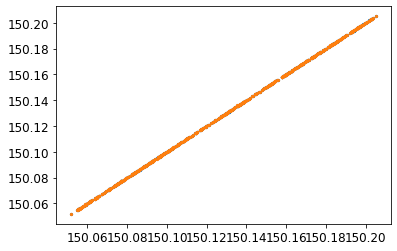

In [36]:
#test tims match
plt.scatter(cat['tim_ra'][tim_matches],cat['tim_ra'][tim_matches],s=5)
plt.scatter(cat['tim_ra'][tim_matches],cat['RA_dash'][tim_matches],s=5)

#plt.ylim(0,2)

## Look at r_light/r_mass in Tims catlog

In [37]:
re_ratio_lm_y = np.array([])
re_ratio_lm_y_err = np.array([])
re_ratio_lm_o = np.array([])
re_ratio_lm_o_err = np.array([])

for i in range(0,len(z_y_q)):
    sizes_lm_y = young_quiescent_sample_tim & (cat['ez_z_phot']>(z_y_q[i]-z_y_q_err[i]))&\
              (cat['ez_z_phot']<(z_y_q[i]+z_y_q_err[i])) 
    re_ratios_lm_y = cat['tim_re_light'][sizes_lm_y]/cat['tim_re_mass'][sizes_lm_y]
    re_ratio_lm_y=np.append(re_ratio_lm_y,np.mean(re_ratios_lm_y))
    re_ratio_lm_y_err = np.append(re_ratio_lm_y_err,np.std(re_ratios_lm_y))
    
    sizes_lm_o = old_quiescent_sample_tim & (cat['ez_z_phot']>(z_o_q[i]-z_o_q_err[i]))&\
              (cat['ez_z_phot']<(z_o_q[i]+z_o_q_err[i]))
    re_ratios_lm_o = cat['tim_re_light'][sizes_lm_o]/cat['tim_re_mass'][sizes_lm_o]
    re_ratio_lm_o = np.append(re_ratio_lm_o,np.mean(re_ratios_lm_o))
    re_ratio_lm_o_err = np.append(re_ratio_lm_o_err,np.std(re_ratios_lm_o))
print(len(time_o_q_err),len(re_ratio_lm_o))

10 10


/opt/miniconda3/envs/grizli/lib/python3.9/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


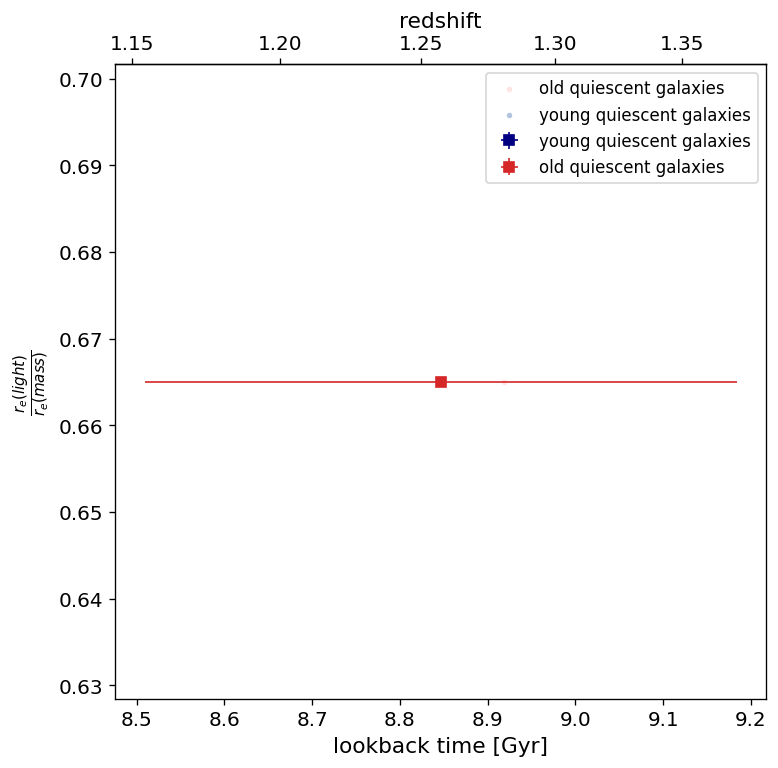

In [38]:
fig,ax14 = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax14.scatter(cosmo.lookback_time(cat['ez_z_phot'][old_quiescent_sample_tim]).value,\
            cat['tim_re_light'][old_quiescent_sample_tim]/cat['tim_re_mass'][old_quiescent_sample_tim],\
               color="mistyrose",label="old quiescent galaxies",s=5)
ax14.scatter(cosmo.lookback_time(cat['ez_z_phot'][young_quiescent_sample_tim]).value,\
            cat['tim_re_light'][young_quiescent_sample_tim]/cat['tim_re_mass'][young_quiescent_sample_tim],\
               color="lightsteelblue",label="young quiescent galaxies",s=5)

ax14.errorbar(time_y_q,re_ratio_lm_y,yerr=re_ratio_lm_y_err,xerr=time_y_q_err,\
               color="navy",fmt='s',label="young quiescent galaxies",capsize=0,elinewidth=1)
ax14.errorbar(time_o_q,re_ratio_lm_o,yerr=re_ratio_lm_o_err,xerr=time_o_q_err,\
               color="tab:red",fmt='s',label="old quiescent galaxies",capsize=0,elinewidth=1)

ax15 = ax14.secondary_xaxis('top', functions=(get_z,get_lookback))
ax15.set_xlabel('redshift',fontsize=13)
ax14.set_xlabel('lookback time [Gyr]',fontsize=13)
ax14.set_ylabel(r'$\frac{r_e (light)} {r_e (mass)}$',fontsize=13)
#plt.title('Tims/Pieters Catalog')
plt.legend(fontsize=10)
plt.savefig('relightmassration_timscatalog.png')

## Postage stemps

Text(0.5, 1.0, 'z=1.701, stellar age=2.6Gyr')

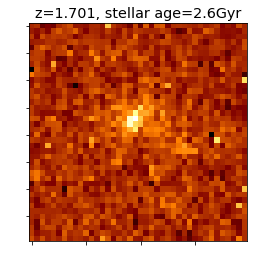

In [39]:

center_x = cat['RA_dash'][id_weird]
center_y = cat['DEC_dash'][id_weird]
stamp_try = get_stamp(center_x,center_y,40)
plt.imshow(stamp_try.data,cmap='afmhot')
plt.xticks(color='None')
plt.yticks(color='None')
plt.title('z='+str(np.round(cat['ez_z_phot'][id_weird],3))+', stellar age='+str(cat['lp_age'][id_weird]/1e9)+'Gyr')

In [40]:
q_sample_2z3 = quiescent_sample & (cat['ez_z_phot']>2) &(cat['ez_z_phot']<3)
print('between 2<z<3 are '+str(np.sum(q_sample_2z3))+' quiescent galaxies')

between 2<z<3 are 63 quiescent galaxies


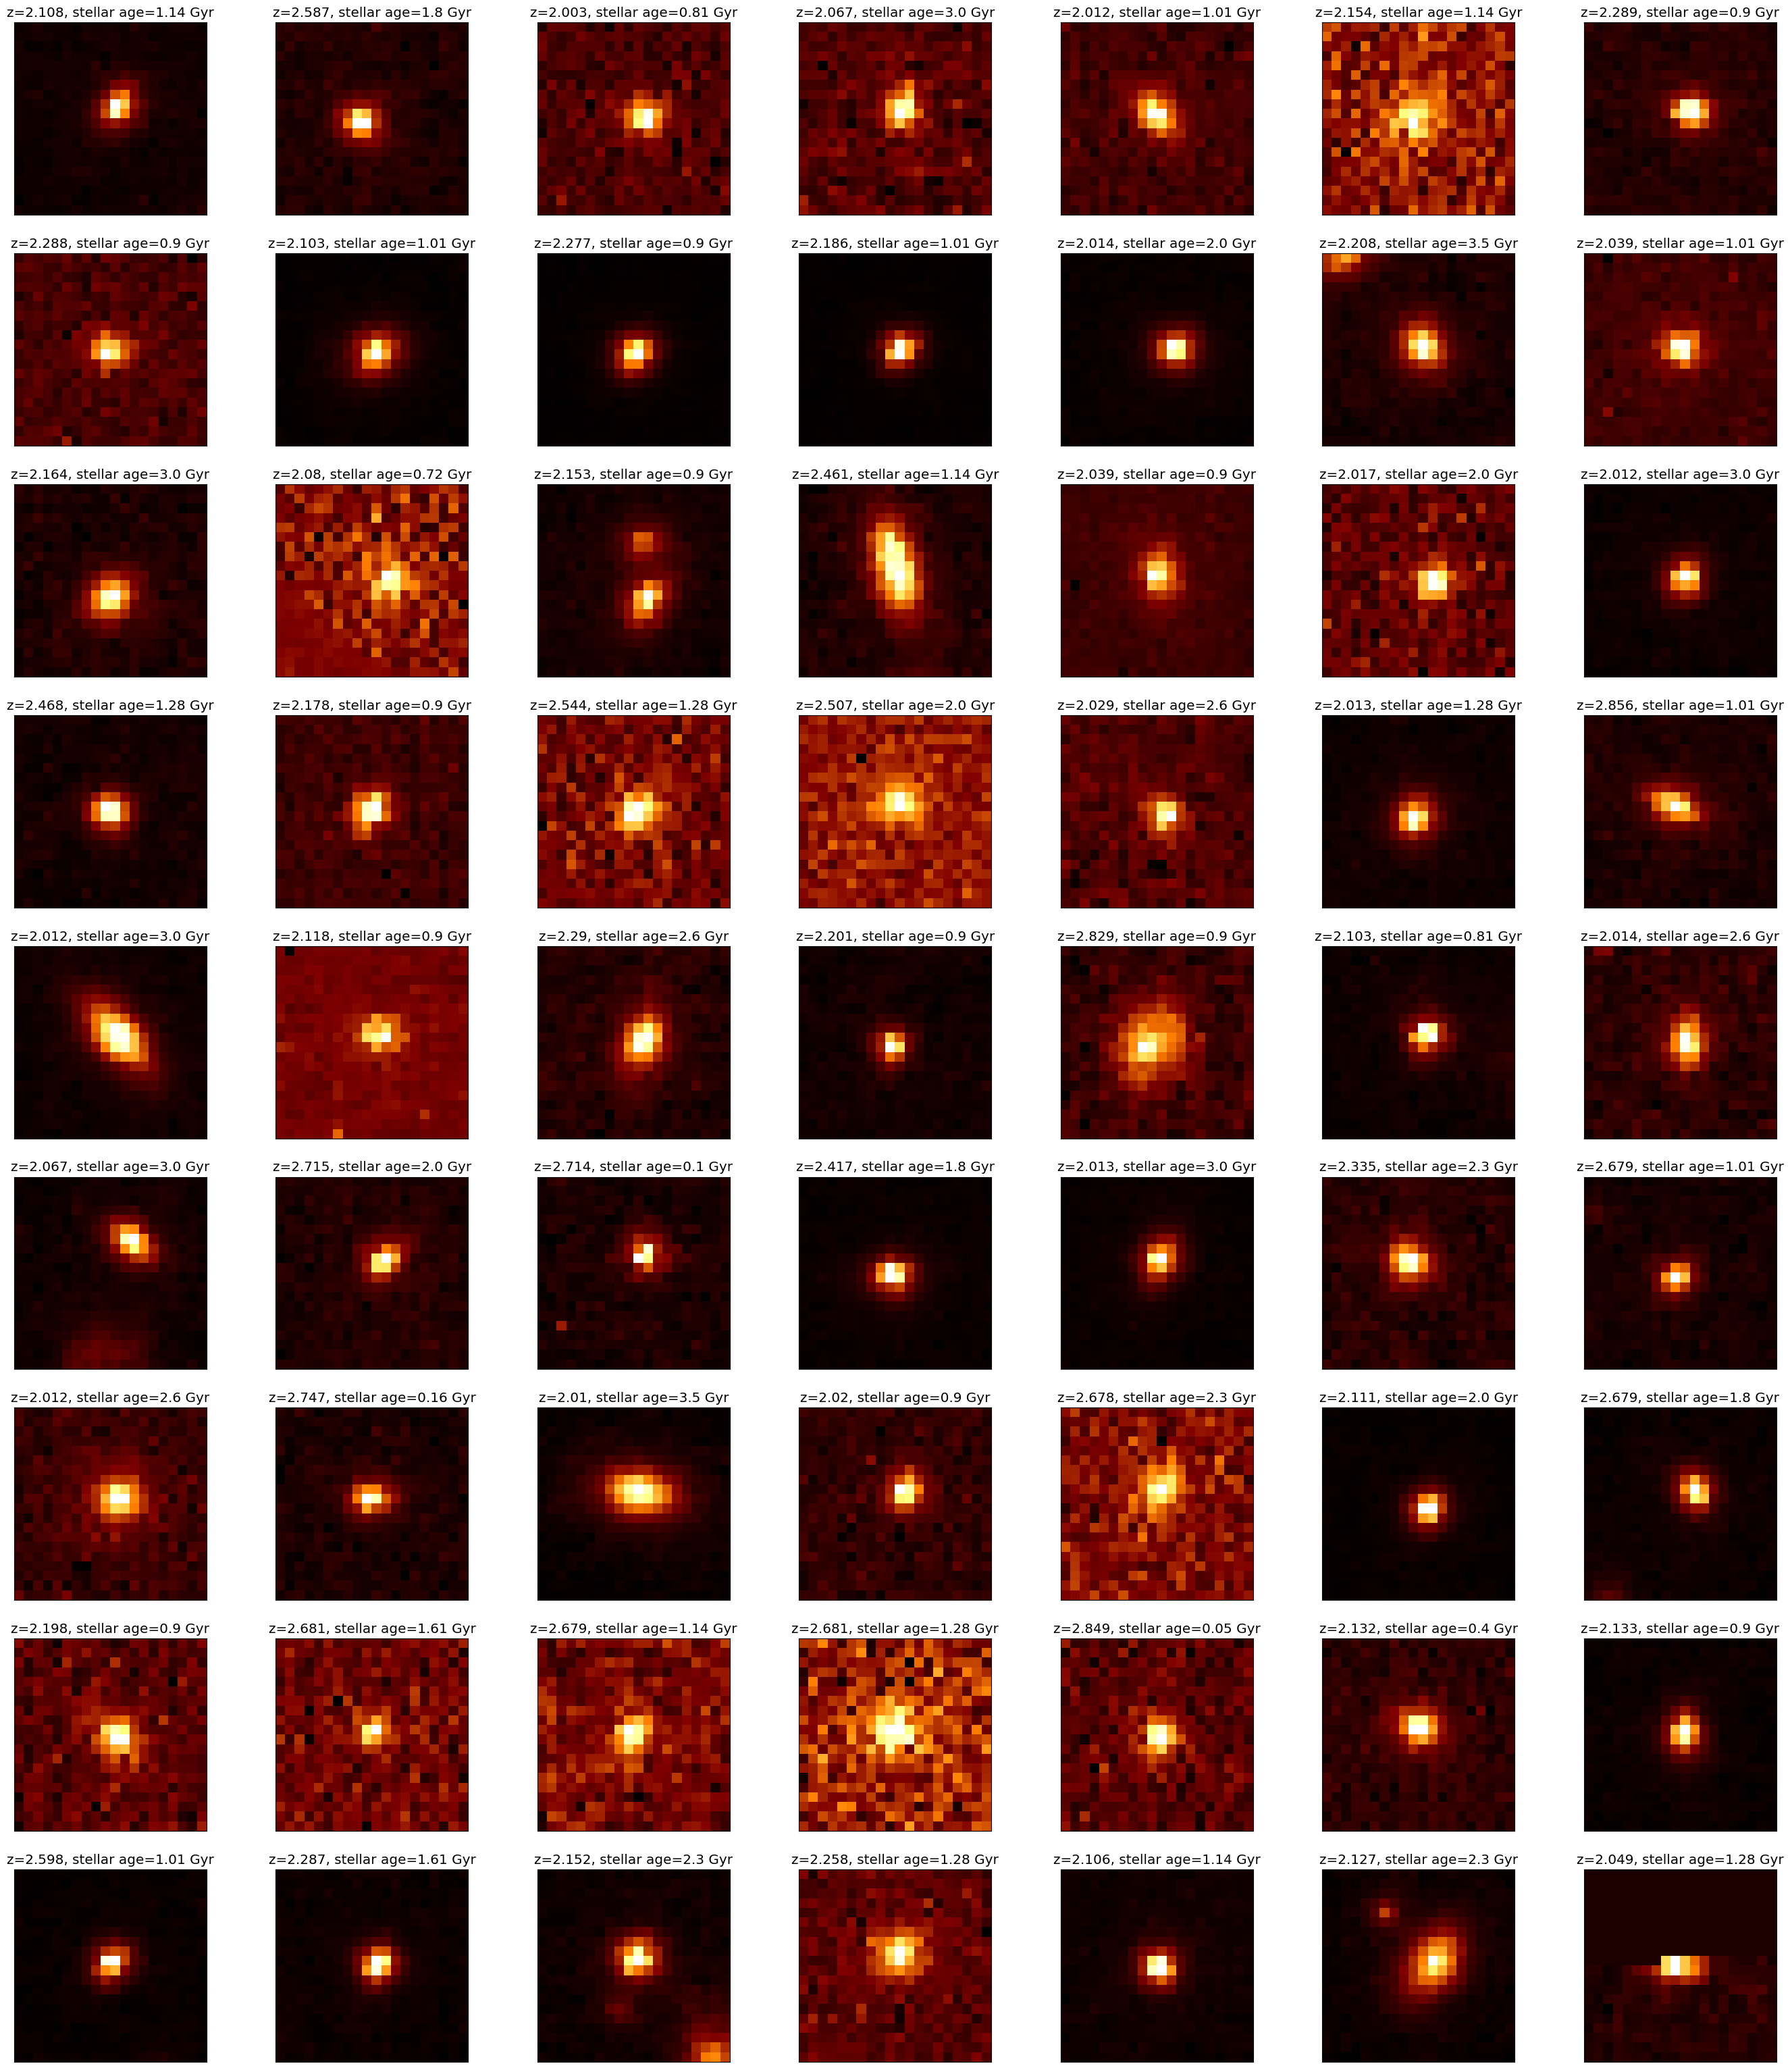

<Figure size 2400x1600 with 0 Axes>

In [41]:
x=0
y=0
fig3, ax3 = plt.subplots(9,7,dpi=100,figsize=(35,40))

for Object in range(0,np.sum(q_sample_2z3)):
    if int(Object/7)==Object/7 and Object>0 and Object<63: 
        x = x+1
        y=0

    center_x = cat['RA_dash'][q_sample_2z3][Object]
    center_y = cat['DEC_dash'][q_sample_2z3][Object]
    stamp = get_stamp(center_x,center_y,20)
    ax3[x][y].imshow(stamp.data,cmap='afmhot')
    ax3[x][y].set_xticks([])
    ax3[x][y].set_yticks([])
    ax3[x][y].set_title('z='+str(np.round(cat['ez_z_phot'][q_sample_2z3][Object],3))+', stellar age='+str(np.round(cat['lp_age'][q_sample_2z3][Object]/1e9,2))+' Gyr')
    y=y+1
# set the spacing between subplots
#plt.subplots_adjust(left=0.1,
#                    bottom=0.1, 
#                    right=0.2, 
#                    top=0.9, 
#                    wspace=0.001, 
#                    hspace=0.05)
#plt.tight_layout(pad=0.1,h_pad=0.01,w_pad=1e-3)
plt.subplots_adjust(wspace=0, hspace=0.2)
plt.figure(dpi=400)
fig3.savefig('stamps_2z3_quiescent.png')

## Mass-vs-redshift plot

In [42]:
#create hist of mass in redshift bins
w_o_masscut_n_mass_redshift_q,w_o_masscut_z_mass_redshift_q, stuff = plt.hist(cat["ez_z_phot"][w_o_masscut_quiescent_sample],bins=20)
plt.close()

#calculate erspective mass limit for redshift bins
w_o_masscut_mass_limit = np.array([])

for x in range(0,len(w_o_masscut_z_mass_redshift_q)-1):
    #print(x,w_o_massscut_z_mass_redshift_q[x])
    w_o_masscut_bin_sample = w_o_masscut_quiescent_sample &(cat["ez_z_phot"]<w_o_masscut_z_mass_redshift_q[x+1]) \
    & (cat["ez_z_phot"]>w_o_masscut_z_mass_redshift_q[x])
    w_o_masscut_mass_limit=np.append(w_o_masscut_mass_limit,lower_mass(w_o_masscut_bin_sample))


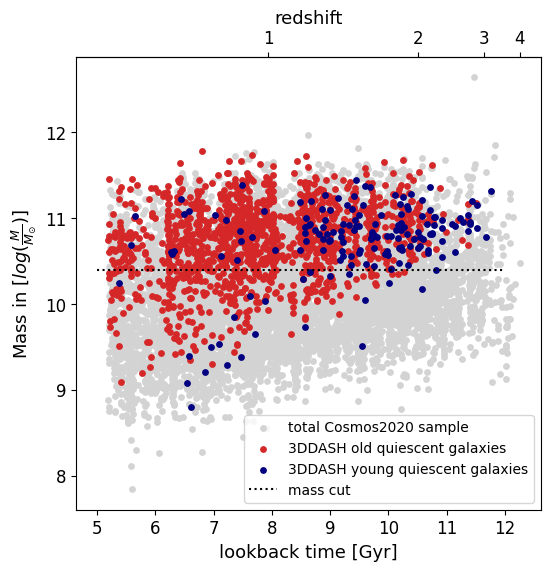

In [43]:
w_o_masscut_old_quiescent_sample = w_o_masscut_quiescent_sample & (np.invert((cat["vj"]<0.9)))
w_o_masscut_young_quiescent_sample = w_o_masscut_quiescent_sample & (cat["vj"]<0.9)


Fig,Ax = plt.subplots(1,1,figsize=(6,6),dpi=100) 



Ax.scatter(cosmo.lookback_time(cat["ez_z_phot"][sample]).value,cat["ez_mass"][sample],\
            s=15,color='lightgrey',label='total Cosmos2020 sample')
Ax.scatter(cosmo.lookback_time(cat["ez_z_phot"][w_o_masscut_old_quiescent_sample]).value,cat["ez_mass"][w_o_masscut_old_quiescent_sample],\
            s=15,color='tab:red',label='3DDASH old quiescent galaxies')
Ax.scatter(cosmo.lookback_time(cat["ez_z_phot"][w_o_masscut_young_quiescent_sample]).value,cat["ez_mass"][w_o_masscut_young_quiescent_sample],\
            s=15,color='navy',label='3DDASH young quiescent galaxies')
ax9 = Ax.secondary_xaxis('top', functions=(get_z,get_lookback))
ax9.set_xlabel('redshift',fontsize=13)

Ax.hlines(y=10.4,xmin=5,xmax=12,color='black',label='mass cut',linestyle='dotted')
Ax.set_xlabel('lookback time [Gyr]',fontsize=13)
Ax.set_ylabel(r"Mass in [$log(\frac{M}{M_{\odot}})$]",fontsize=13)
#Ax.set_title("Sample selection",fontsize=20)
plt.legend(fontsize=10)
Fig.savefig('SampleSelection.png')

## figures I was playing around with

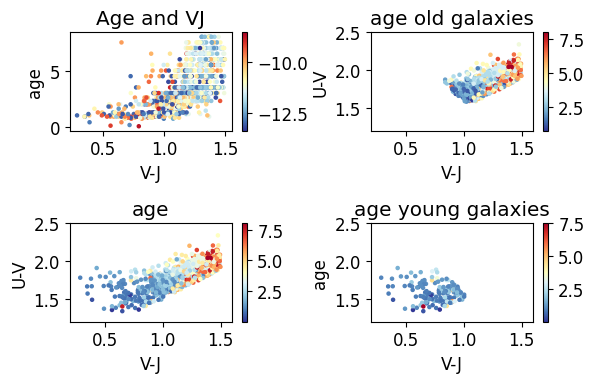

In [44]:
fig,ax1 = plt.subplots(2,2,dpi=100)

im1 = ax1[0][0].scatter(cat["vj"][quiescent_sample],cat["lp_age"][quiescent_sample]/1e9,\
                        c = cat["ssfr"][quiescent_sample],s=5,cmap='RdYlBu_r')
ax1[0][0].set_xlabel("V-J")
ax1[0][0].set_ylabel("age")
ax1[0][0].set_title("Age and VJ")
fig.colorbar(im1, ax=ax1[0][0], orientation='vertical')


im1 = ax1[1][0].scatter(cat["vj"][quiescent_sample],cat["uv"][quiescent_sample],\
                        c = cat["lp_age"][quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[1][0].set_xlabel("V-J")
ax1[1][0].set_ylabel("U-V")
ax1[1][0].set_title("age")
ax1[1][0].set_xlim(0.2,1.6)
ax1[1][0].set_ylim(1.2,2.5)
ax1[1][0].set_clim=(0.5,10)

fig.colorbar(im1, ax=ax1[1][0], orientation='vertical')

im1 = ax1[0][1].scatter(cat["vj"][old_quiescent_sample],cat["uv"][old_quiescent_sample],\
                        c = cat["lp_age"][old_quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[0][1].set_xlabel("V-J")
ax1[0][1].set_ylabel("U-V")
ax1[0][1].set_title("age old galaxies")
ax1[0][1].set_xlim(0.2,1.6)
ax1[0][1].set_ylim(1.2,2.5)
ax1[0][1].set_clim=(0.5,10)
fig.colorbar(im1, ax=ax1[0][1], orientation='vertical')


im1 = ax1[1][1].scatter(cat["vj"][young_quiescent_sample],cat["uv"][young_quiescent_sample],\
                        c = cat["lp_age"][young_quiescent_sample]/1e9,s=5,cmap='RdYlBu_r')
ax1[1][1].set_xlabel("V-J")
ax1[1][1].set_ylabel("age")
ax1[1][1].set_title("age young galaxies")
ax1[1][1].set_xlim(0.2,1.6)
ax1[1][1].set_ylim(1.2,2.5)
ax1[1][1].set_clim=(0.5,10)
fig.colorbar(im1, ax=ax1[1][1], orientation='vertical')


fig.tight_layout()